# **Chargement des bibliothèques et fonctions: à executer**

In [1]:
## pas besoins de lancer ce code : instalation de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## à lancer pour importer les bibliothèques nécessaires. (selenieum ne fonctionne pas sur le web)
import warnings
warnings.filterwarnings("ignore")
from time import sleep
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
### fonction visulalisation d'un avis cliens : choisir un indice
def afficher (indice):
# indice = 5
  print('Valeurs pour indice',indice)
  for colonne in df.columns:
    print(colonne , ':------>',df[colonne][indice],'')

### fonction visulalisation d'un avis cliens : choisir un indice
def afficher_test (indice):
# indice = 5
  print('Valeurs pour indice',indice)
  for colonne in df_test.columns:
    print(colonne , ':------>',df_test[colonne][indice],'')

# **DataViz : Données brutes**

In [ ]:
### chargement et lecture de fichier brut non traité

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## chemin vert le fichier sur drive
df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_brut.xlsx')
# df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_traduit.xlsx')
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   categorie_bis     66061 non-null  object
 1   companies         66061 non-null  object
 2   noms              66057 non-null  object
 3   titre_com         66061 non-null  object
 4   commentaire       66061 non-null  object
 5   reponses          17961 non-null  object
 6   notes             66061 non-null  object
 7   date_experience   66061 non-null  object
 8   date_commentaire  66061 non-null  object
 9   site              66061 non-null  object
 10  nombre_pages      66061 non-null  int64 
 11  date_scrap        66061 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.0+ MB


categorie_bis         companies        noms  \
0  furniture_store  Made.com Reviews  Dara Teste   
1  furniture_store  Made.com Reviews       marie   
2  furniture_store  Made.com Reviews       Bruno   
3  furniture_store  Made.com Reviews     Shurong   
4  furniture_store  Made.com Reviews       Amene   

                                titre_com  \
0  I placed an order and paid via Paypal…   
1          Suspension correspondant à la…   
2   Great products and fantastic service.   
3                       Fantastic quality   
4                           color precise   

                                         commentaire  \
0  I placed an order and paid via Paypal on augus...   
1  Suspension correspondant à la description fait...   
2               Date of experience: October 24, 2022   
3  Fantastic quality! Worth waiting. We ordered t...   
4  Hello I like made. It's a bit expensive but an...   

                                            reponses  \
0                                                NaN   
1  <p class="typography_body-m__xgxZ_ typography_...   
2  <p class="typography_body-m__xgxZ_ typography_...   
3  <p class="typography_body-m__xgxZ_ typography_...   
4  <p class="typography_body-m__xgxZ_ typography_...   

                                               notes  \
0  <div class="star-rating_starRating__4rrcf star...   
1  <div class="star-rating_starRating__4rrcf star...   
2  <div class="star-rating_starRating__4rrcf star...   
3  <div class="star-rating_starRating__4rrcf star...   
4  <div class="star-rating_starRating__4rrcf star...   

                        date_experience date_commentaire  \
0    Date of experience: March 11, 2023     Mar 11, 2023   
1  Date of experience: October 11, 2022     Oct 26, 2022   
2  Date of experience: October 24, 2022     Oct 24, 2022   
3     Date of experience: June 05, 2022      Jun 5, 2022   
4   Date of experience: August 25, 2022     Aug 25, 2022   

                                                site  nombre_pages  date_scrap  
0  https://www.trustpilot.com/review/made.com/fr?...            53  17-09-2023  
1  https://www.trustpilot.com/review/made.com/fr?...            53  17-09-2023  
2  https://www.trustpilot.com/review/made.com/fr?...            53  17-09-2023  
3  https://www.trustpilot.com/review/made.com/fr?...            53  17-09-2023  
4  https://www.trustpilot.com/review/made.com/fr?...            53  17-09-2023

In [ ]:
## Fonction pour afficher le détail d'une ligne
afficher(1101)

Valeurs pour indice 1101
categorie_bis :-----------> furniture_store 
companies :-----------> Vente-unique.com  
noms :-----------> Fanta Kourouma 
titre_com :-----------> J’adore ma table facile à monter et le… 
commentaire :-----------> J’adore ma table facile à monter et le design est juste magnifique 🥰😍✌🏽Merci merci merci !!! 
reponses :-----------> nan 
notes :-----------> 5 
date_experience :-----------> 2022-04-30 00:00:00 
date_commentaire :-----------> 2022-04-30 00:00:00 
site :-----------> https://www.trustpilot.com/review/www.vente-unique.com?page=4 
nombre_pages :-----------> 27 
date_scrap :-----------> 17-09-2023 
verified :-----------> 0 
année_experience :-----------> 2022 
mois_experience :-----------> 4 
jour_experience :-----------> 30 
année_commentaire :-----------> 2022 
mois_commentaire :-----------> 4 
jour_commentaire :-----------> 30 
leadtime_com_exp :-----------> 0 
nombre_caractères :-----------> 92 
nombre_maj :-----------> 2 
nombre_car_spé :----------->

In [ ]:
afficher(8064)
# afficher(7392)

Valeurs pour indice 8064
categorie_bis :
-----------> jewelry_store 
companies :
-----------> Toonzshop Reviews 
noms :
-----------> Kum shiva 
titre_com :
-----------> Combi short au top tres bonne coupe… 
commentaire :
-----------> Combi short au top tres bonne coupe textile Super confort !sue du bonheur 😍🤗 
reponses :
-----------> nan 
notes :
-----------> <div class="star-rating_starRating__4rrcf star-rating_medium__iN6Ty"><img alt="Rated 5 out of 5 stars" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-5.svg"/></div> 
date_experience :
-----------> Date of experience: June 18, 2019 
date_commentaire :
-----------> Jun 18, 2019Verified 
site :
-----------> https://www.trustpilot.com/review/www.toonzshop.com?page=63 
nombre_pages :
-----------> 70 
date_scrap :
-----------> 17-09-2023 


# **DataViz: avant data cleaning**



---



In [ ]:
## Instalation de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####
### chargement et lecture de fichier brut traité non traduit

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## chemin vert le fichier sur drive
df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_non_traduit.xlsx')
# df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_traduit.xlsx')
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
pd.set_option('display.max_rows', None) ## pour afficher toutes les lignes d'un df
pd.set_option('display.max_columns', None) ## pour afficher toutes les colonnes d'un df

## pour remettre les paramètres par défaut:

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   categorie_bis          65584 non-null  object        
 1   companies              65584 non-null  object        
 2   noms                   65580 non-null  object        
 3   titre_com              65584 non-null  object        
 4   commentaire            65584 non-null  object        
 5   reponses               17824 non-null  object        
 6   notes                  65584 non-null  int64         
 7   date_experience        65584 non-null  datetime64[ns]
 8   date_commentaire       65584 non-null  datetime64[ns]
 9   site                   65584 non-null  object        
 10  nombre_pages           65584 non-null  int64         
 11  date_scrap             65584 non-null  object        
 12  verified               65584 non-null  int64         
 13  a

categorie_bis  companies        noms  \
0  furniture_store  Made.com   Dara Teste   
1  furniture_store  Made.com        marie   
2  furniture_store  Made.com        Bruno   
3  furniture_store  Made.com      Shurong   
4  furniture_store  Made.com        Amene   

                                titre_com  \
0  I placed an order and paid via Paypal…   
1          Suspension correspondant à la…   
2   Great products and fantastic service.   
3                       Fantastic quality   
4                           color precise   

                                         commentaire  \
0  I placed an order and paid via Paypal on augus...   
1  Suspension correspondant à la description fait...   
2              Great products and fantastic service.   
3  Fantastic quality! Worth waiting. We ordered t...   
4  Hello I like made. It's a bit expensive but an...   

                                            reponses  notes date_experience  \
0                                                NaN      1      2023-03-11   
1  Bonjour Marie,Mille mercis pour votre avis 5 é...      5      2022-10-11   
2  Bonjour Bruno,Mille mercis pour votre avis 5 é...      5      2022-10-24   
3  Bonjour,Merci pour votre commande et votre avi...      5      2022-06-05   
4  Bonjour Amene,Merci pour votre retour d'expéri...      4      2022-08-25   

  date_commentaire                                               site  \
0       2023-03-11  https://www.trustpilot.com/review/made.com/fr?...   
1       2022-10-26  https://www.trustpilot.com/review/made.com/fr?...   
2       2022-10-24  https://www.trustpilot.com/review/made.com/fr?...   
3       2022-06-05  https://www.trustpilot.com/review/made.com/fr?...   
4       2022-08-25  https://www.trustpilot.com/review/made.com/fr?...   

   nombre_pages  date_scrap  verified  année_experience  mois_experience  \
0            53  17-09-2023         0              2023                3   
1            53  17-09-2023         0              2022               10   
2            53  17-09-2023         0              2022               10   
3            53  17-09-2023         0              2022                6   
4            53  17-09-2023         0              2022                8   

   jour_experience  année_commentaire  mois_commentaire  jour_commentaire  \
0               11               2023                 3                11   
1               11               2022                10                26   
2               24               2022                10                24   
3                5               2022                 6                 5   
4               25               2022                 8                25   

   leadtime_com_exp  nombre_caractères  nombre_maj  nombre_car_spé  \
0                 0                119           4               1   
1                15                103           4               3   
2                 0                 37           1               1   
3                 0                325           7              13   
4                 0                344           9               7   

  caractères_spé  emojis_positifs_count  emojis_negatifs_count  
0             []                      0                      0  
1             []                      0                      0  
2             []                      0                      0  
3          ['’']                      0                      0  
4          ["'"]                      0                      0

In [ ]:
afficher(1101)

Valeurs pour indice 1101
categorie_bis :
-----------> furniture_store 
companies :
-----------> Vente-unique.com  
noms :
-----------> Fanta Kourouma 
titre_com :
-----------> J’adore ma table facile à monter et le… 
commentaire :
-----------> J’adore ma table facile à monter et le design est juste magnifique 🥰😍✌🏽Merci merci merci !!! 
reponses :
-----------> nan 
notes :
-----------> 5 
date_experience :
-----------> 2022-04-30 00:00:00 
date_commentaire :
-----------> 2022-04-30 00:00:00 
site :
-----------> https://www.trustpilot.com/review/www.vente-unique.com?page=4 
nombre_pages :
-----------> 27 
date_scrap :
-----------> 17-09-2023 
verified :
-----------> 0 
année_experience :
-----------> 2022 
mois_experience :
-----------> 4 
jour_experience :
-----------> 30 
année_commentaire :
-----------> 2022 
mois_commentaire :
-----------> 4 
jour_commentaire :
-----------> 30 
leadtime_com_exp :
-----------> 0 
nombre_caractères :
-----------> 92 
nombre_maj :
-----------> 2 
nombre

Il y a 16 variables numériques, 10 variables textuelles et 2 variables de temps.
Il y a des valeurs manquantes pour la variable réponse et la variable nom.
Le dataframe n'est pas totalement fini ce qui explique les valeurs manquantes pour la variable "Emojis".

In [ ]:
df.shape


(65584, 26)

Il y a 65452 données et 28 variables ce qui est assez pour effectuer un modèle de machine learning.


In [ ]:
df.head(20)

Unnamed: 0    categorie_bis  companies                 noms  \
0            0  furniture_store  Made.com            Dara Teste   
1            1  furniture_store  Made.com                 marie   
2            2  furniture_store  Made.com                 Bruno   
3            3  furniture_store  Made.com               Shurong   
4            4  furniture_store  Made.com                 Amene   
5            5  furniture_store  Made.com                 Sobia   
6            6  furniture_store  Made.com                    Lu   
7            7  furniture_store  Made.com                  line   
8            8  furniture_store  Made.com            S Bartlett   
9            9  furniture_store  Made.com                  Soso   
10          10  furniture_store  Made.com                   Ced   
11          11  furniture_store  Made.com         Michele Chang   
12          12  furniture_store  Made.com        Sadia Hamlaoui   
13          13  furniture_store  Made.com        Ms Vicki Roach   
14          14  furniture_store  Made.com   Dominique Vilaplana   
15          15  furniture_store  Made.com    Catherine BOUCHARD   
16          16  furniture_store  Made.com          Tina Prodger   
17          17  furniture_store  Made.com               Thierry   
18          18  furniture_store  Made.com             client(e)   
19          19  furniture_store  Made.com            Christiane   

                                   titre_com  \
0     I placed an order and paid via Paypal…   
1             Suspension correspondant à la…   
2      Great products and fantastic service.   
3                          Fantastic quality   
4                              color precise   
5     Hello Thanks I like all what get from…   
6                                Great shop!   
7                  Good products and service   
8         I ordered a chest of drawers from…   
9                           Choice and price   
10                              Good product   
11                            Gorgeous table   
12                    Très belle table basse   
13                     A First Class Company   
14                  Très beau produit design   
15    Nice and beautiful items and furniture   
16                          Great experience   
17  Lustre suspension rotin correspond à la…   
18                       They stole my money   
19                               No delivery   

                                          commentaire  \
0   I placed an order and paid via Paypal on augus...   
1   Suspension correspondant à la description fait...   
2               Great products and fantastic service.   
3   Fantastic quality! Worth waiting. We ordered t...   
4   Hello I like made. It's a bit expensive but an...   
5   Hello Thanks I like all what get from your web...   
6   Products are very nice quality and stylish.  M...   
7   Customer service was excellent and very respon...   
8   I ordered a chest of drawers from Made.com in ...   
9   Choice, good promotion and a special welcoming...   
10  Delivery was done in 4 days, with all componen...   
11  It took quite a while to receive the order (th...   
12  Très belle table basse - J'adore le style. Ell...   
13  I recently purchased two sofas, a pouffe and v...   
14  Très beau produit design. Correspond à  la des...   
15  Nice and beautiful items and furniture. Easy t...   
16  Great experience - even when we had a slight i...   
17  Lustre suspension rotin correspond à la descri...   
18  They stole my money, never delivered the produ...   
19  I ordered on 21/10/22. Delivery information wa...   

                                             reponses  notes date_experience  \
0                                                 NaN      1      2023-03-11   
1   Bonjour Marie,Mille mercis pour votre avis 5 é...      5      2022-10-11   
2   Bonjour Bruno,Mille mercis pour votre avis 5 é...      5      2022-10-24   
3   Bonjour,Merci pour votre commande et votre avi...      5      202

Le dataframe suivant n'est pas définitif.
Lors du datacleaning, nous supprimerons les variables: Unamed et noms qui n'apporte pas d'informations.
De plus, l'étape de traduction est en cours. Et d'autres variables seront crées.

In [ ]:
# On calcule le taux de NA
df.isna().sum() / len(df)



categorie_bis            0.000000
companies                0.000000
noms                     0.000061
titre_com                0.000000
commentaire              0.000000
reponses                 0.728226
notes                    0.000000
date_experience          0.000000
date_commentaire         0.000000
site                     0.000000
nombre_pages             0.000000
date_scrap               0.000000
verified                 0.000000
année_experience         0.000000
mois_experience          0.000000
jour_experience          0.000000
année_commentaire        0.000000
mois_commentaire         0.000000
jour_commentaire         0.000000
leadtime_com_exp         0.000000
nombre_caractères        0.000000
nombre_maj               0.000000
nombre_car_spé           0.000000
caractères_spé           0.000000
emojis_positifs_count    0.000000
emojis_negatifs_count    0.000000
dtype: float64

On observe des valeurs manquantes pour les variables "Noms" et "réponse".
La variable "Noms" ne sera pas très utile pour la modélisation, on peut donc la supprimer
La variable "Réponse" peut être encodé en 0 (pas de réponse) et 1(une réponse) afin de voir l'influence sur la note associé. Ou on peut tout simplement la supprimer car il y a tout de même 70% de valeurs manquantes.


In [ ]:
df.duplicated().sum()

0

Il n'y a pas de lignes dupliquées.

In [ ]:
df['categorie_bis'].unique()

array(['furniture_store', 'bank', 'travel_insurance_company',
       'car_dealer', 'jewelry_store', 'clothing_store',
       'electronics_technology', 'fitness_and_nutrition_service',
       'pet_store', 'activewear_store', 'womens_clothing_store',
       'bedroom_furniture_store', 'appliance_store', 'bicycle_store',
       'mens_clothing_store', 'mortgage_broker', 'shoe_store',
       'cosmetics_store', 'electronics_store', 'energy_supplier',
       'garden_center', 'insurance_agency', 'real_estate_agents',
       'travel_agency'], dtype=object)

In [ ]:
df["categorie_bis"].value_counts()

activewear_store                 9658
cosmetics_store                  7302
clothing_store                   6728
appliance_store                  6569
travel_agency                    6138
womens_clothing_store            3566
electronics_store                3050
jewelry_store                    2793
bank                             2747
furniture_store                  2385
garden_center                    1804
electronics_technology           1751
travel_insurance_company         1517
bicycle_store                    1509
pet_store                        1381
mens_clothing_store              1331
fitness_and_nutrition_service    1136
bedroom_furniture_store          1060
insurance_agency                  820
energy_supplier                   790
real_estate_agents                722
mortgage_broker                   333
shoe_store                        231
car_dealer                        131
Name: categorie_bis, dtype: int64

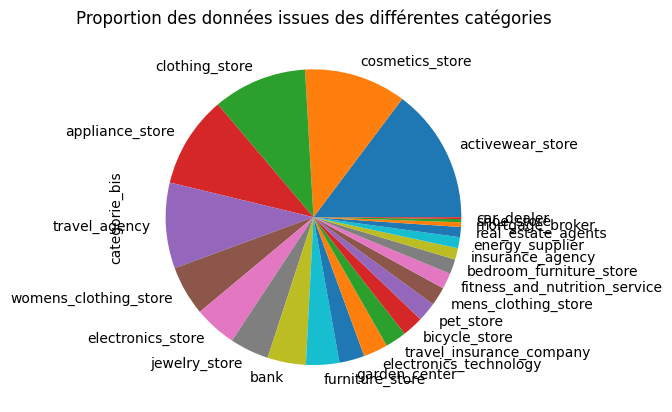

In [ ]:
df["categorie_bis"].value_counts(normalize=True).plot(kind='pie')
plt.title('Proportion des données issues des différentes catégories');



Les catégories les plus représentées sont: activewear_store (9658), cosmetics_store (7302), clothing_store (6728), appliance_store              (6569), travel_agency (6138).

In [ ]:
df['companies'].unique()

array(['Made.com\xa0', 'Vente-unique.com\xa0', 'Miliboo\xa0',
       'Habitat & Jardin\xa0', 'Hypnia\xa0', 'Monde Du Tabouret\xa0',
       "Alice's Garden\xa0", 'The Cool Republic\xa0',
       'DESENIO FRANCE\xa0', 'Meubles Concept\xa0', 'Younited Credit\xa0',
       'Cofidis\xa0', 'Orange Bank\xa0', 'Floabank\xa0', 'Anytime\xa0',
       'Boursorama Banque\xa0', 'Immoprêt\xa0', 'Monabanq\xa0',
       'Fortuneo\xa0', 'Oney\xa0', 'HEYME\xa0', 'RefundMyTicket\xa0',
       'Axa Schengen\xa0', 'Allianz Travel \xa0', 'Yupwego\xa0',
       'Mondialcare\xa0', 'Koala\xa0',
       'ACS Assurances Voyage & Expatriation\xa0',
       'AVA Assurance Voyages & Assistance\xa0',
       'Assurance Voyage Schengen\xa0', 'Aramisauto\xa0',
       'Autohero France\xa0', 'Démarches Carte Grise\xa0',
       'CarNext.com France\xa0', 'bodemerauto.com\xa0', 'AutoJM\xa0',
       'Degrifcars.com\xa0', 'CARIZY\xa0',
       'Renault Dacia BodemerAuto Quimper\xa0',
       'Renault Dacia BodemerAuto Saint-Brieuc\xa0'

In [ ]:
df["companies"].value_counts()

UBALDI.com                               6105
Vestiaire Collective                     4732
MENLOOK                                  4428
Florihana                                4085
Voyage Prive                             2937
                                         ... 
MeilleursBiens.com                          3
WELMO                                       2
ACS Assurances Voyage & Expatriation        2
Tolmar                                      1
Assurance Voyage Schengen                   1
Name: companies, Length: 222, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


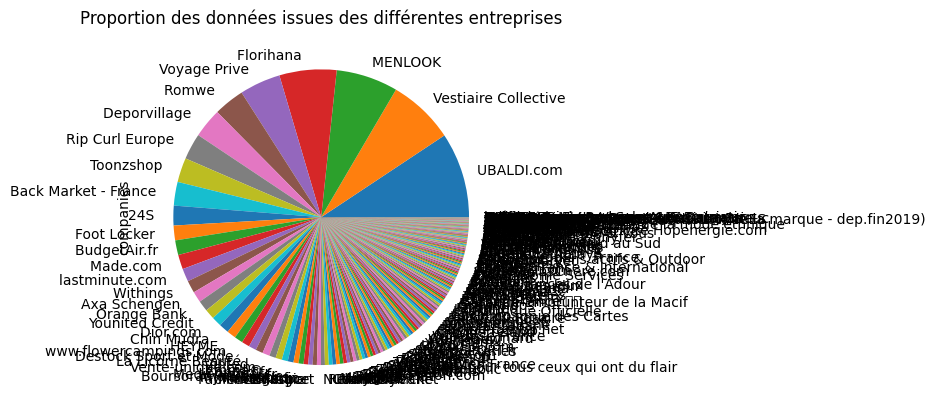

In [ ]:
df["companies"].value_counts(normalize=True).plot(kind='pie')
plt.title('Proportion des données issues des différentes entreprises');

Les entreprises les plus représentées sont : UBALDI.com (6105), Vestiaire Collective (4732), MENLOOK (4428), Florihana (4085), Voyage Prive (2937).

In [ ]:
df['notes'].unique()

array([1, 5, 4, 3, 2])

In [ ]:
df["notes"].value_counts()

5    46047
1     9365
4     6717
3     1904
2     1419
Name: notes, dtype: int64

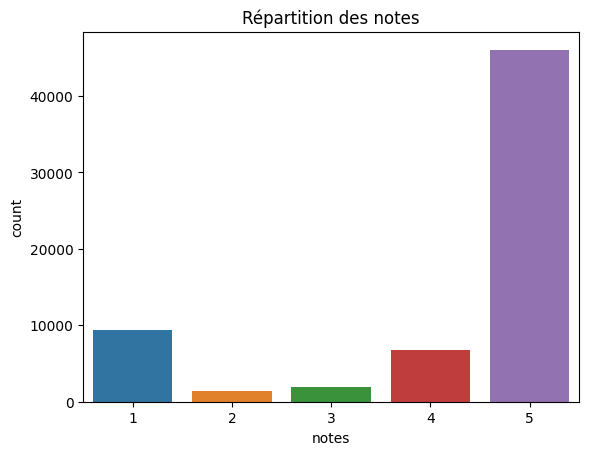

In [ ]:

sns.countplot(x='notes', data = df)
plt.title('Répartition des notes');



La majorité des notes attribués sont bonnes. Mais il y a quand même quelques mauvaises notes.  
De plus, il y a très peu de notes intermédiares. Les clients donnent des notes extrêmes.
Donc les clients sont soit très satisfait (5 = la majorité) soit très insatisfait (1).
=> La distribution des notes ne suit pas une loi normale. Elle est déséquilibrée ce qui suppose de pré-traiter les données avant l'étape de modélisation.

In [ ]:
notesca = df[['notes','companies']].groupby('companies').mean().sort_values(by='notes', ascending=False)
notesca.reset_index(0, inplace=True)
notesca.head(10)

companies     notes
0          MeilleursBiens.com   5.000000
1                      Tolmar   5.000000
2                       imkiz   5.000000
3    Dépannage photovoltaïque   5.000000
4                       WELMO   5.000000
5              Cabinet Letort   5.000000
6  Agence de Financement ARAF   5.000000
7                     Crédigo   5.000000
8                        Imop   5.000000
9                        ilek   4.962963

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


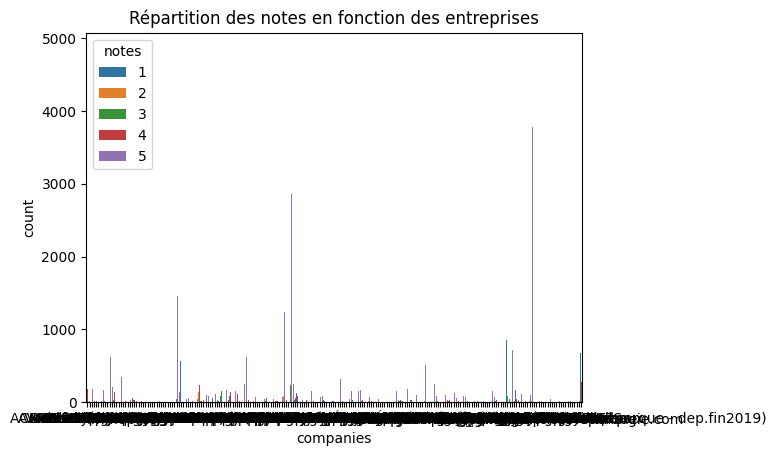

In [ ]:
sns.countplot(x='companies', hue='notes', data=df);
plt.title('Répartition des notes en fonction des entreprises');

Les entreprises qui ont obtenus les meileures notes sont: MeilleursBiens, Tolmar, imkiz, Dépannage photovoltaïque, WELMO, Cabinet Letort, Agence de Financement ARAF, Crédigo, Imop.
Mais vu le nombre important d'entreprises c'est difficile à représenter.
Le modèle ciblera en priorité les entreprises qui auront obtenus les plus mauvaises notes.

In [ ]:
notesca = df[['notes','categorie_bis']].groupby('categorie_bis').mean().sort_values(by='notes', ascending=False)
notesca.reset_index(0, inplace=True)
notesca.head(10)

categorie_bis     notes
0                mortgage_broker  4.852853
1                cosmetics_store  4.714051
2         electronics_technology  4.701314
3                appliance_store  4.688842
4  fitness_and_nutrition_service  4.674296
5                           bank  4.650164
6        bedroom_furniture_store  4.550000
7             real_estate_agents  4.548476
8                     car_dealer  4.541985
9                     shoe_store  4.493506

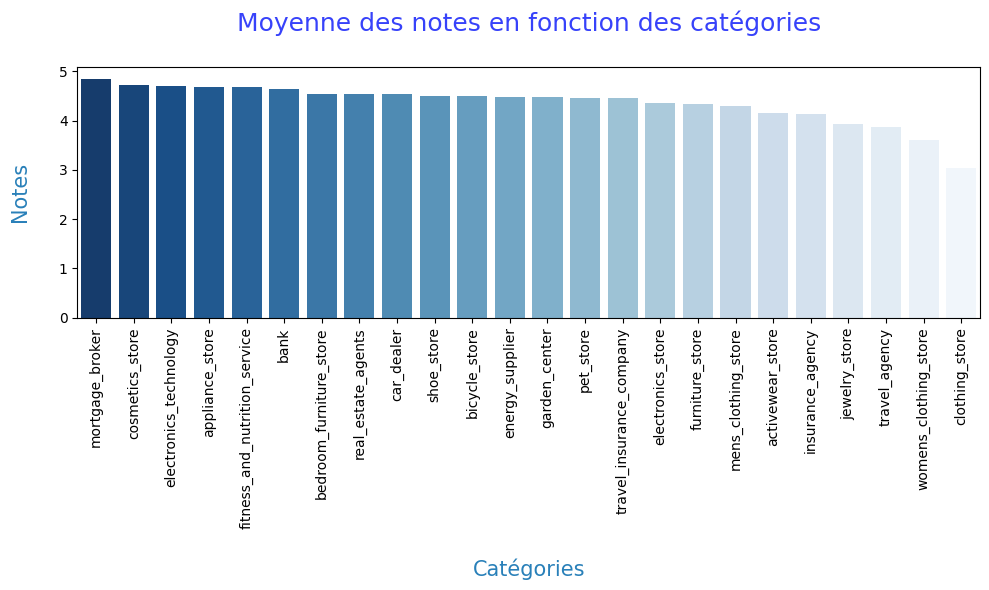

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x= notesca['categorie_bis'], y= notesca['notes'], palette="Blues_r")
plt.xlabel('\nCatégories', fontsize=15, color='#2980b9')
plt.ylabel('Notes\n', fontsize=15, color='#2980b9')
plt.title("Moyenne des notes en fonction des catégories\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

En moyenne, les catégories les mieux notées sont: bank,bedroom_furniture_store, car_dealer, cosmetics_store, electronics_technology, real_estate_agents, fitness_and_nutrition_service, appliance_store, mortgage_broker.
La catégorie la moins bien notée est clothing_store. Ce sont les catégories les moins bien notés qui seront ciblées par le modèle afin d'améliorer la satisfaction client.

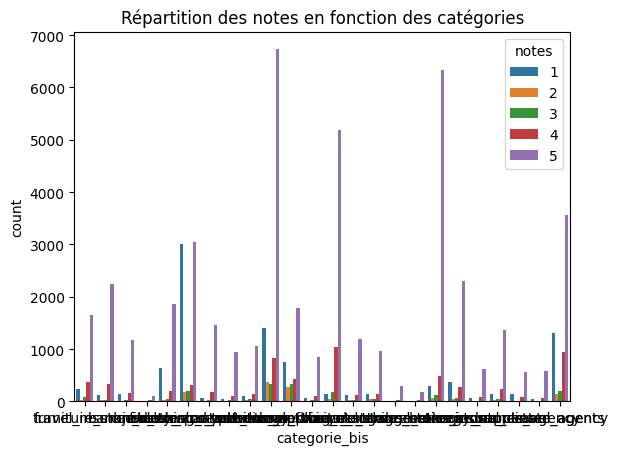

In [ ]:
sns.countplot(x='categorie_bis', hue='notes', data=df);
plt.title('Répartition des notes en fonction des catégories');

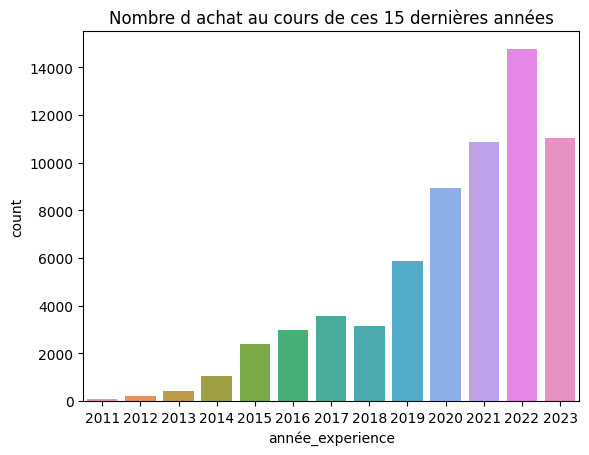

In [ ]:
  sns.countplot(x='année_experience', data=df);
  plt.title('Nombre d achat au cours de ces 15 dernières années');

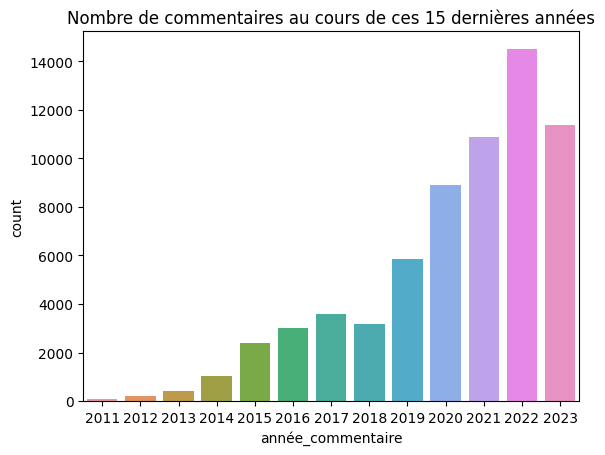

In [ ]:
  sns.countplot(x='année_commentaire', data=df);
  plt.title('Nombre de commentaires au cours de ces 15 dernières années');

Le nombre d'achat a augmenté au cours de ces 15 dernières années avec une forte augmentation durant la période COVID.

Cette augmentation s'accompagne d'une augmentation du nombre d'avis au cours des années.

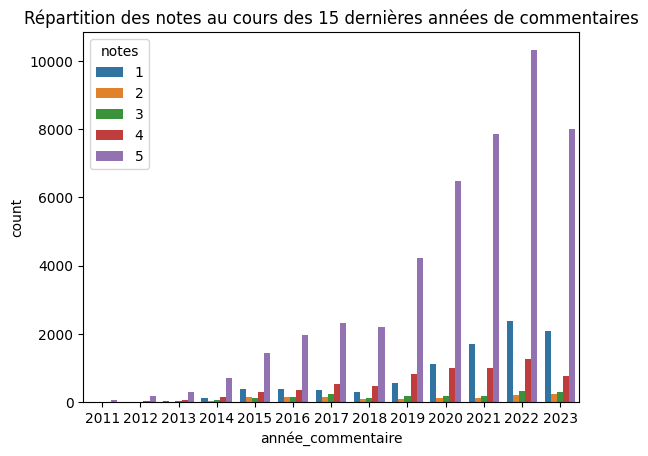

In [ ]:
  sns.countplot(x='année_commentaire', hue='notes', data=df);
  plt.title('Répartition des notes au cours des 15 dernières années de commentaires');

Il y a une forte augmentation de très bonnes notes (5) au cours des années.
Il y a également une augmentation un peu moins marquée de bonnes notes (4) et de très mauvaises notes (1).
Enfin, le nombre de note 2, 3 ne varie pas énormément.
Donc, les clients sont de plus en plus satisfaits au cours des années.

De plus, on observe une répartition globale des notes similaire au cours des années: il y a une majorité de notes très positives (5), un peu moins de notes très négatives (1) et très peu de notes intermédiaires.
Ce sont les notes négatives que l'on ciblera dans ce modèle.

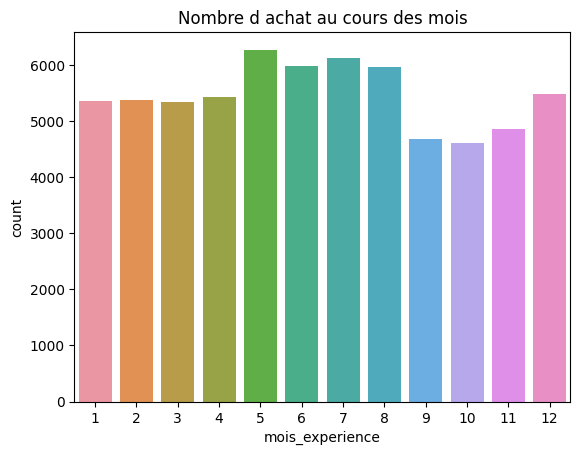

In [ ]:
  sns.countplot(x='mois_experience', data=df);
  plt.title('Nombre d achat au cours des mois');

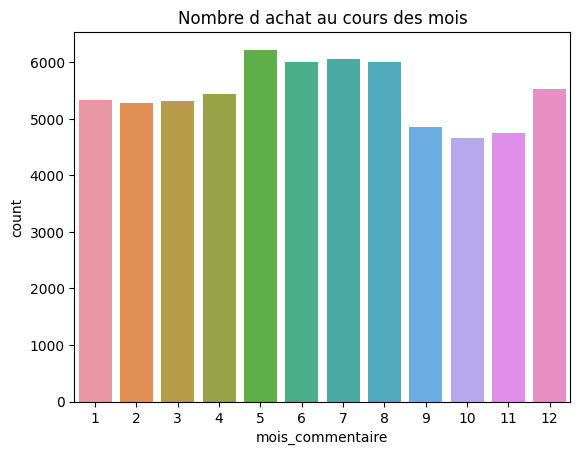

In [ ]:
  sns.countplot(x='mois_commentaire', data=df);
  plt.title('Nombre de commentaire au cours des mois');

On observe que le nombre d'achat est plus important pendant les mois de mai, juin, juillet et août.
La même distribution est observée concernant le nombre de commentaire.

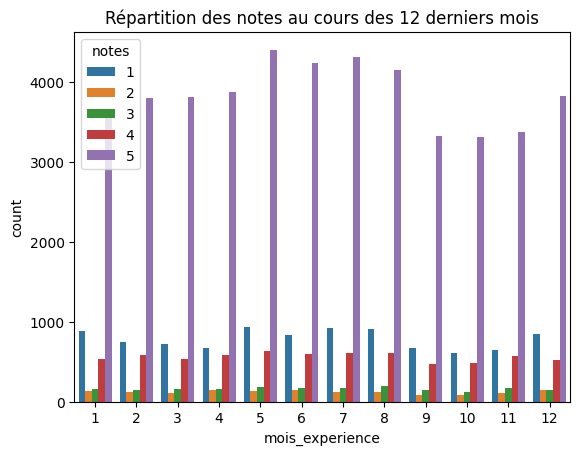

In [ ]:
  sns.countplot(x='mois_experience', hue='notes', data=df);
  plt.title('Répartition des notes au cours des mois');

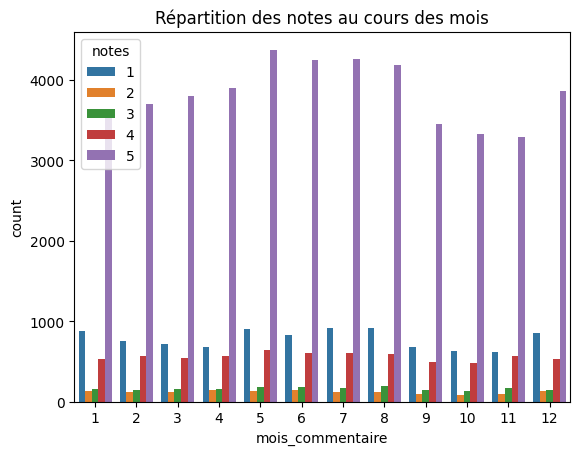

In [ ]:
  sns.countplot(x='mois_commentaire', hue='notes', data=df);
  plt.title('Répartition des notes au cours des mois');

On observe la même proportion de chaque note en fonction des mois donc il n'y a pas eu de différence de notation au cours des mois. La satisfaction client semble rester stable.

In [ ]:
df['leadtime_com_exp'].describe()

count    65452.000000
mean         3.387750
std         29.486278
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2108.000000
Name: leadtime_com_exp, dtype: float64

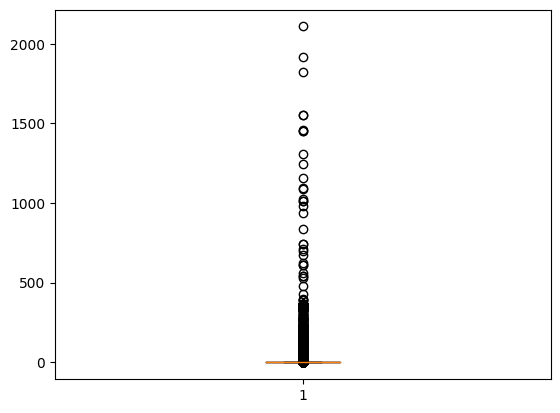

In [ ]:

plt.boxplot(df['leadtime_com_exp']);

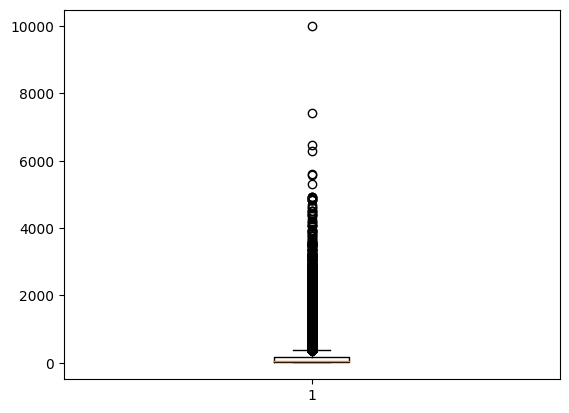

In [ ]:
plt.boxplot(df['nombre_caractères']);


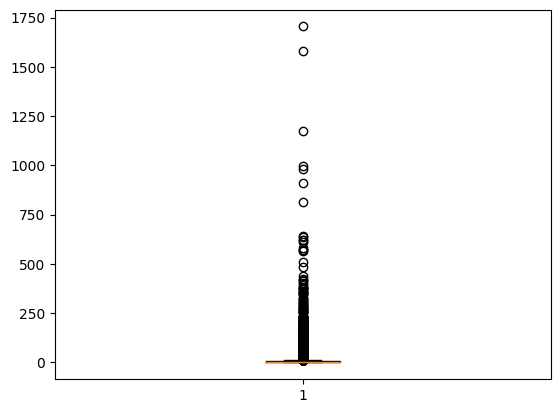

In [ ]:
plt.boxplot(df['nombre_maj']);

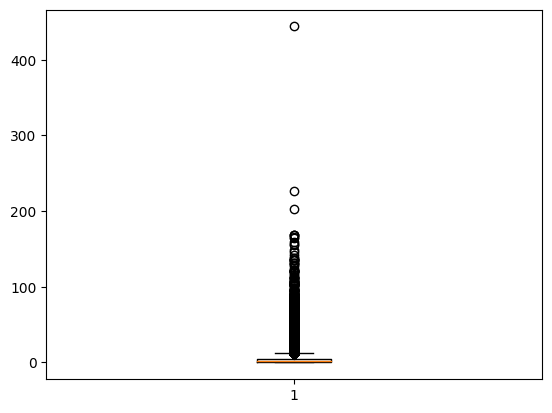

In [ ]:
plt.boxplot(df['nombre_car_spé']);

Il y a beaucoup de valeurs aberrantes pour les variables suivantes:  nombre_car_spé, nombre_maj, nombre_caractères, leadtime_com_exp. Ces valeurs sont à étudier afin de savoir si nous les supprimerons ou non.

Text(0.5, 1.0, 'Distribution du nombre de caractère par notes')

<Figure size 1000x1000 with 0 Axes>

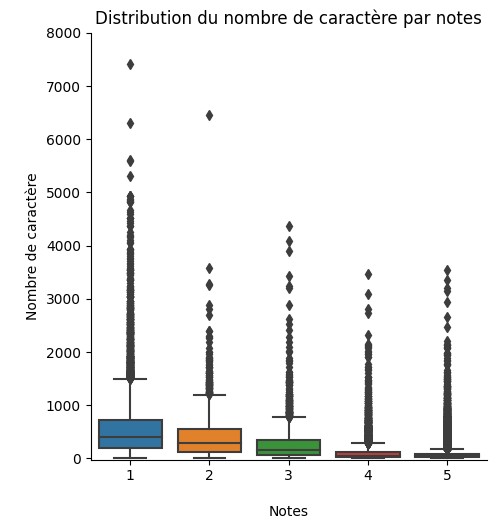

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot( x = 'notes', y = 'nombre_caractères', kind = 'box',  data = df);
plt.xlabel("\nNotes")
plt.ylabel("\nNombre de caractère")
plt.ylim(-20, 8000)
plt.title("Distribution du nombre de caractère par notes")

On observe ici que plus le nombre de caractère est important et plus le commentaire semble être associé à une note négative.


<Figure size 1000x1000 with 0 Axes>

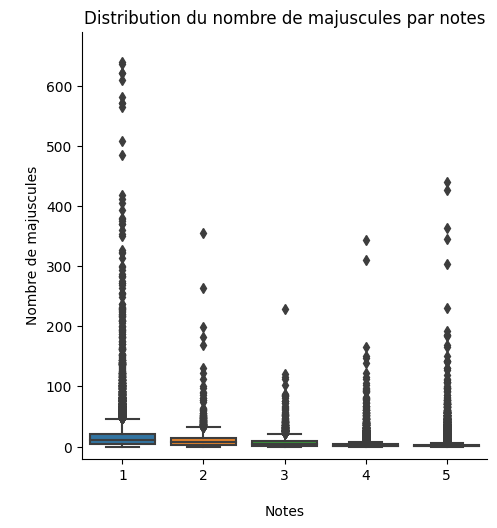

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot( x = 'notes', y = 'nombre_maj', kind = 'box',  data = df);
plt.xlabel("\nNotes")
plt.ylabel("\nNombre de majuscules")
plt.ylim(-20, 690)
plt.title("Distribution du nombre de majuscules par notes");

Le nombre de majuscule ne semble pas avoir une influence sur la note attribué.

Text(0.5, 1.0, 'Distribution du nombre de caractères spéciaux par notes')

<Figure size 1000x1000 with 0 Axes>

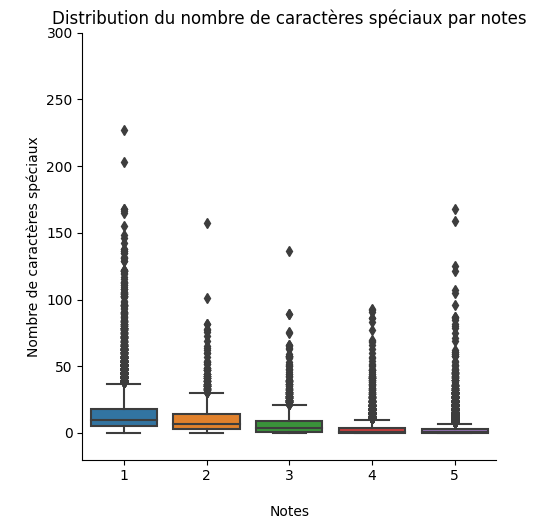

In [ ]:

plt.figure(figsize=(10,10))
sns.catplot( x = 'notes', y = 'nombre_car_spé', kind = 'box',  data = df);
plt.xlabel("\nNotes")
plt.ylabel("\nNombre de caractères spéciaux")
plt.ylim(-20, 300)
plt.title("Distribution du nombre de caractères spéciaux par notes")

On observe ici que plus le nombre de caractère spéciaux est important et plus le commentaire semble être associé à une note négative.

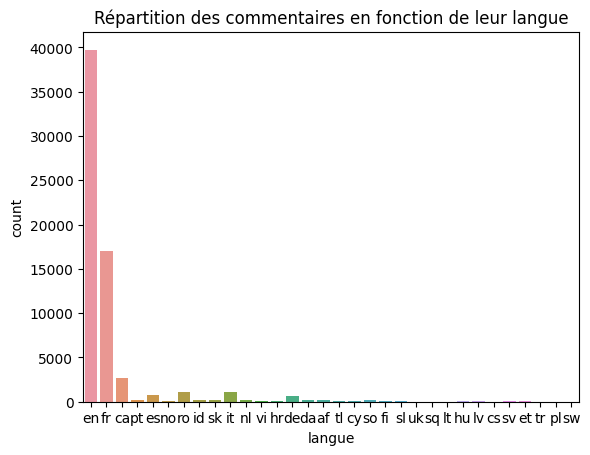

In [ ]:
sns.countplot(x='langue', data = df)
plt.title('Répartition des commentaires en fonction de leur langue');

Afin de déterminer en quelle langue nous allons traduire les commentaires, nous avons compter la proportion de commentaires dans les différentes langues présentes. Il y a une majorité de commentaires en anglais donc les commentaires seront traduits en anglais.

In [ ]:
df.describe()

Unnamed: 0         notes  nombre_pages      verified  \
count  65452.000000  65452.000000  65452.000000  65452.000000   
mean   33046.056316      4.201827    138.910637      0.476044   
std    19087.121949      1.437487    149.516630      0.499430   
min        0.000000      1.000000      1.000000      0.000000   
25%    16558.750000      4.000000     16.000000      0.000000   
50%    33024.500000      5.000000     77.000000      0.000000   
75%    49618.250000      5.000000    206.000000      1.000000   
max    66060.000000      5.000000    619.000000      1.000000   

       année_experience  mois_experience  jour_experience  année_commentaire  \
count      65452.000000     65452.000000     65452.000000       65452.000000   
mean        2020.225921         6.400568        15.642318        2020.233637   
std            2.485485         3.384453         8.806428           2.488799   
min         2011.000000         1.000000         1.000000        2011.000000   
25%         2019.000000         4.000000         8.000000        2019.000000   
50%         2021.000000         6.000000        16.000000        2021.000000   
75%         2022.000000         9.000000        23.000000        2022.000000   
max         2023.000000        12.000000        31.000000        2023.000000   

       mois_commentaire  jour_commentaire  leadtime_com_exp  \
count      65452.000000      65452.000000      65452.000000   
mean           6.416290         15.735715          3.387750   
std            3.381179          8.781019         29.486278   
min            1.000000          1.000000         -1.000000   
25%            4.000000          8.000000          0.000000   
50%            6.000000         16.000000          0.000000   
75%            9.000000         23.000000          0.000000   
max           12.000000         31.000000       2108.000000   

       nombre_caractères    nombre_maj  nombre_car_spé  nombre_smiley  Emojis  
count       65452.000000  65452.000000    65452.000000   65452.000000     0.0  
mean          165.780954      5.879729        4.583634       0.010267     NaN  
std           324.383301     20.840779        9.125647       0.123675     NaN  
min             8.000000      0.000000        0.000000       0.000000     NaN  
25%            22.000000      1.000000        0.000000       0.000000     NaN  
50%            52.000000      2.000000        2.000000       0.000000     NaN  
75%           160.000000      5.000000        5.000000       0.000000     NaN  
max          9986.000000   1705.000000      444.000000      15.000000     NaN

<ipython-input-86-793d548f3a20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


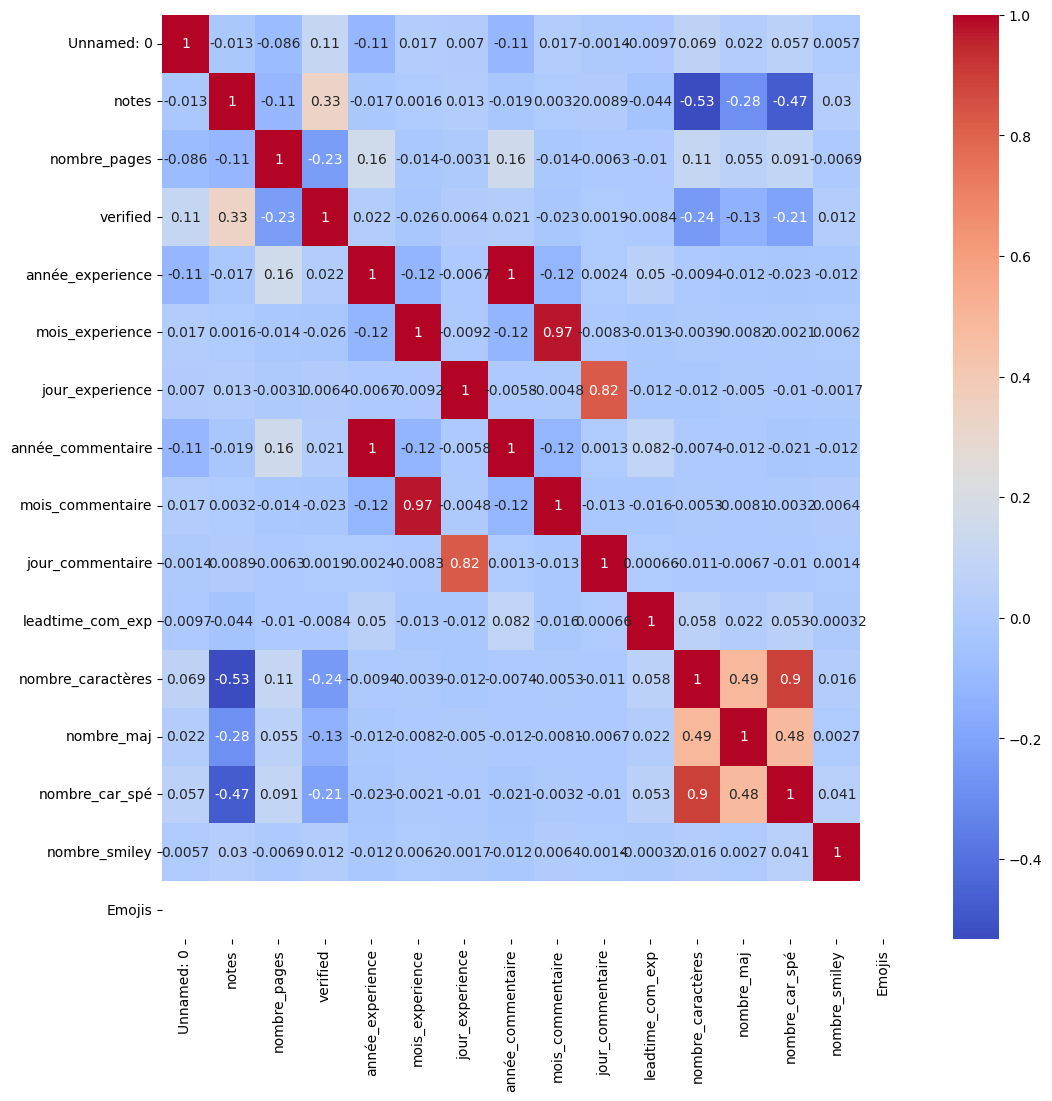

In [ ]:
cor = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');


La variable cible (notes) semble être corrélée avec le nombre de caractères, le nombre de caractère spéciaux et le nombre de majuscule.
Cependant, on voit qu'il y a collinéarité entre ces variables.

**Notes prises lors du points avec Yohan le 20 septembre:**
- Rajouter des données
- Traduire les commentaires en Français
- Définir 3-4mots qui ont une note de 1,2,3,4,5
- Extraire nombre de caractère, les mots fréquents, nombre de jours entre les dates, le nombre de smileys
- Tracer des words cloud en supprimant les déterminants et les stops word (bibliothèque nltk pour supprimer les stops word)
- Distribution des données
- Tracer la répartition des notes en fonction des catégories, companies, de la date d'achat


.



# **DataViz: après data cleaning et Feature engineering**

In [ ]:
## Instalation de google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### chargement et lecture de fichier Final_data_scraped_traité_traduit
df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_traduit_ok_fini.xlsx')


Preprocessing data

In [ ]:
df.info()
df.loc[df.noms=='Fanta Kourouma'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65460 entries, 0 to 65459
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   categorie_bis           65460 non-null  object        
 1   companies               65460 non-null  object        
 2   noms                    65456 non-null  object        
 3   titre_com               65460 non-null  object        
 4   commentaire             65460 non-null  object        
 5   reponses                17804 non-null  object        
 6   notes                   65460 non-null  int64         
 7   date_experience         65460 non-null  datetime64[ns]
 8   date_commentaire        65460 non-null  datetime64[ns]
 9   site                    65460 non-null  object        
 10  nombre_pages            65460 non-null  int64         
 11  date_scrap              65460 non-null  object        
 12  verified                65460 non-null  int64 

categorie_bis          companies            noms  \
1099  furniture_store  Vente-unique.com   Fanta Kourouma   

                                    titre_com  \
1099  J’adore ma table facile à monter et le…   

                                            commentaire reponses  notes  \
1099  J’adore ma table facile à monter et le design ...      NaN      5   

     date_experience date_commentaire  \
1099      2022-04-30       2022-04-30   

                                                   site  ...  \
1099  https://www.trustpilot.com/review/www.vente-un...  ...   

                                         commentaire_en verif_traduction  \
1099  I love my table easy to climb and the design i...           !!EN!!   

                                     commentaire_en_bis  \
1099  I love my table easy to climb and the design i...   

      cat_nombre_caractères  cat_nombre_maj  notes_bis  \
1099                      4             1.0          1   

                                 commentaire_en_sans_SW  verif_reponses  \
1099  love table easy climb design beautiful thank t...               0   

      nombre_point_intero  nombre_point_exclam  
1099                    0                    3  

[1 rows x 38 columns]

In [ ]:
afficher(1099)

Valeurs pour indice 1099
categorie_bis :------> furniture_store 
companies :------> Vente-unique.com  
noms :------> Fanta Kourouma 
titre_com :------> J’adore ma table facile à monter et le… 
commentaire :------> J’adore ma table facile à monter et le design est juste magnifique 🥰😍✌🏽Merci merci merci !!! 
reponses :------> nan 
notes :------> 5 
date_experience :------> 2022-04-30 00:00:00 
date_commentaire :------> 2022-04-30 00:00:00 
site :------> https://www.trustpilot.com/review/www.vente-unique.com?page=4 
nombre_pages :------> 27 
date_scrap :------> 17-09-2023 
verified :------> 0 
année_experience :------> 2022 
mois_experience :------> 4 
jour_experience :------> 30 
année_commentaire :------> 2022 
mois_commentaire :------> 4 
jour_commentaire :------> 30 
leadtime_com_exp :------> 0 
nombre_caractères :------> 92 
nombre_maj :------> 2 
nombre_car_spé :------> 8 
caractères_spé :------> ['’', '🥰', '😍', '✌', '🏽'] 
emojis_positifs_count :------> 2 
emojis_negatifs_count :---

Il y a 21 variables numériques, 15 variables textuelles et 2 variables de temps.

In [ ]:
# On calcule le taux de NA
df.isna().sum() / len(df)

categorie_bis             0.000000
companies                 0.000000
noms                      0.000061
titre_com                 0.000000
commentaire               0.000000
reponses                  0.728017
notes                     0.000000
date_experience           0.000000
date_commentaire          0.000000
site                      0.000000
nombre_pages              0.000000
date_scrap                0.000000
verified                  0.000000
année_experience          0.000000
mois_experience           0.000000
jour_experience           0.000000
année_commentaire         0.000000
mois_commentaire          0.000000
jour_commentaire          0.000000
leadtime_com_exp          0.000000
nombre_caractères         0.000000
nombre_maj                0.000000
nombre_car_spé            0.000000
caractères_spé            0.000000
emojis_positifs_count     0.000000
emojis_negatifs_count     0.000000
commentaire_text          0.000000
langue                    0.000000
commentaire_en      

 Il y a des valeurs manquantes pour la variable "réponse", la variable "cat_nombre_maj", la variable "commentaire_en_sans_SW".

In [ ]:
## il y a 5 lignes présentant des valeurs manquantes dans la colonne "commentaire_en_sans_SW" que nous avons décidés de supprimer
df.dropna(subset=['commentaire_en_sans_SW'], inplace=True)

## remplacer les NAN par 1 dans la colonne 'cat_nombre_maj'
df['cat_nombre_maj'].fillna(1, inplace=True)

## La colonne "verif_reponses" correspond au codage en binaire de la variable "réponse": 1(présence d'une réponse), 0(pas de réponse).

In [ ]:
df.duplicated().sum()

363

Il y a 363 lignes dupliquées.

In [ ]:
df.shape

(65455, 38)

Il y a 65460 données et 38 variables ce qui est assez pour effectuer un modèle de machine learning.

**Identification des catégories et entreprises**

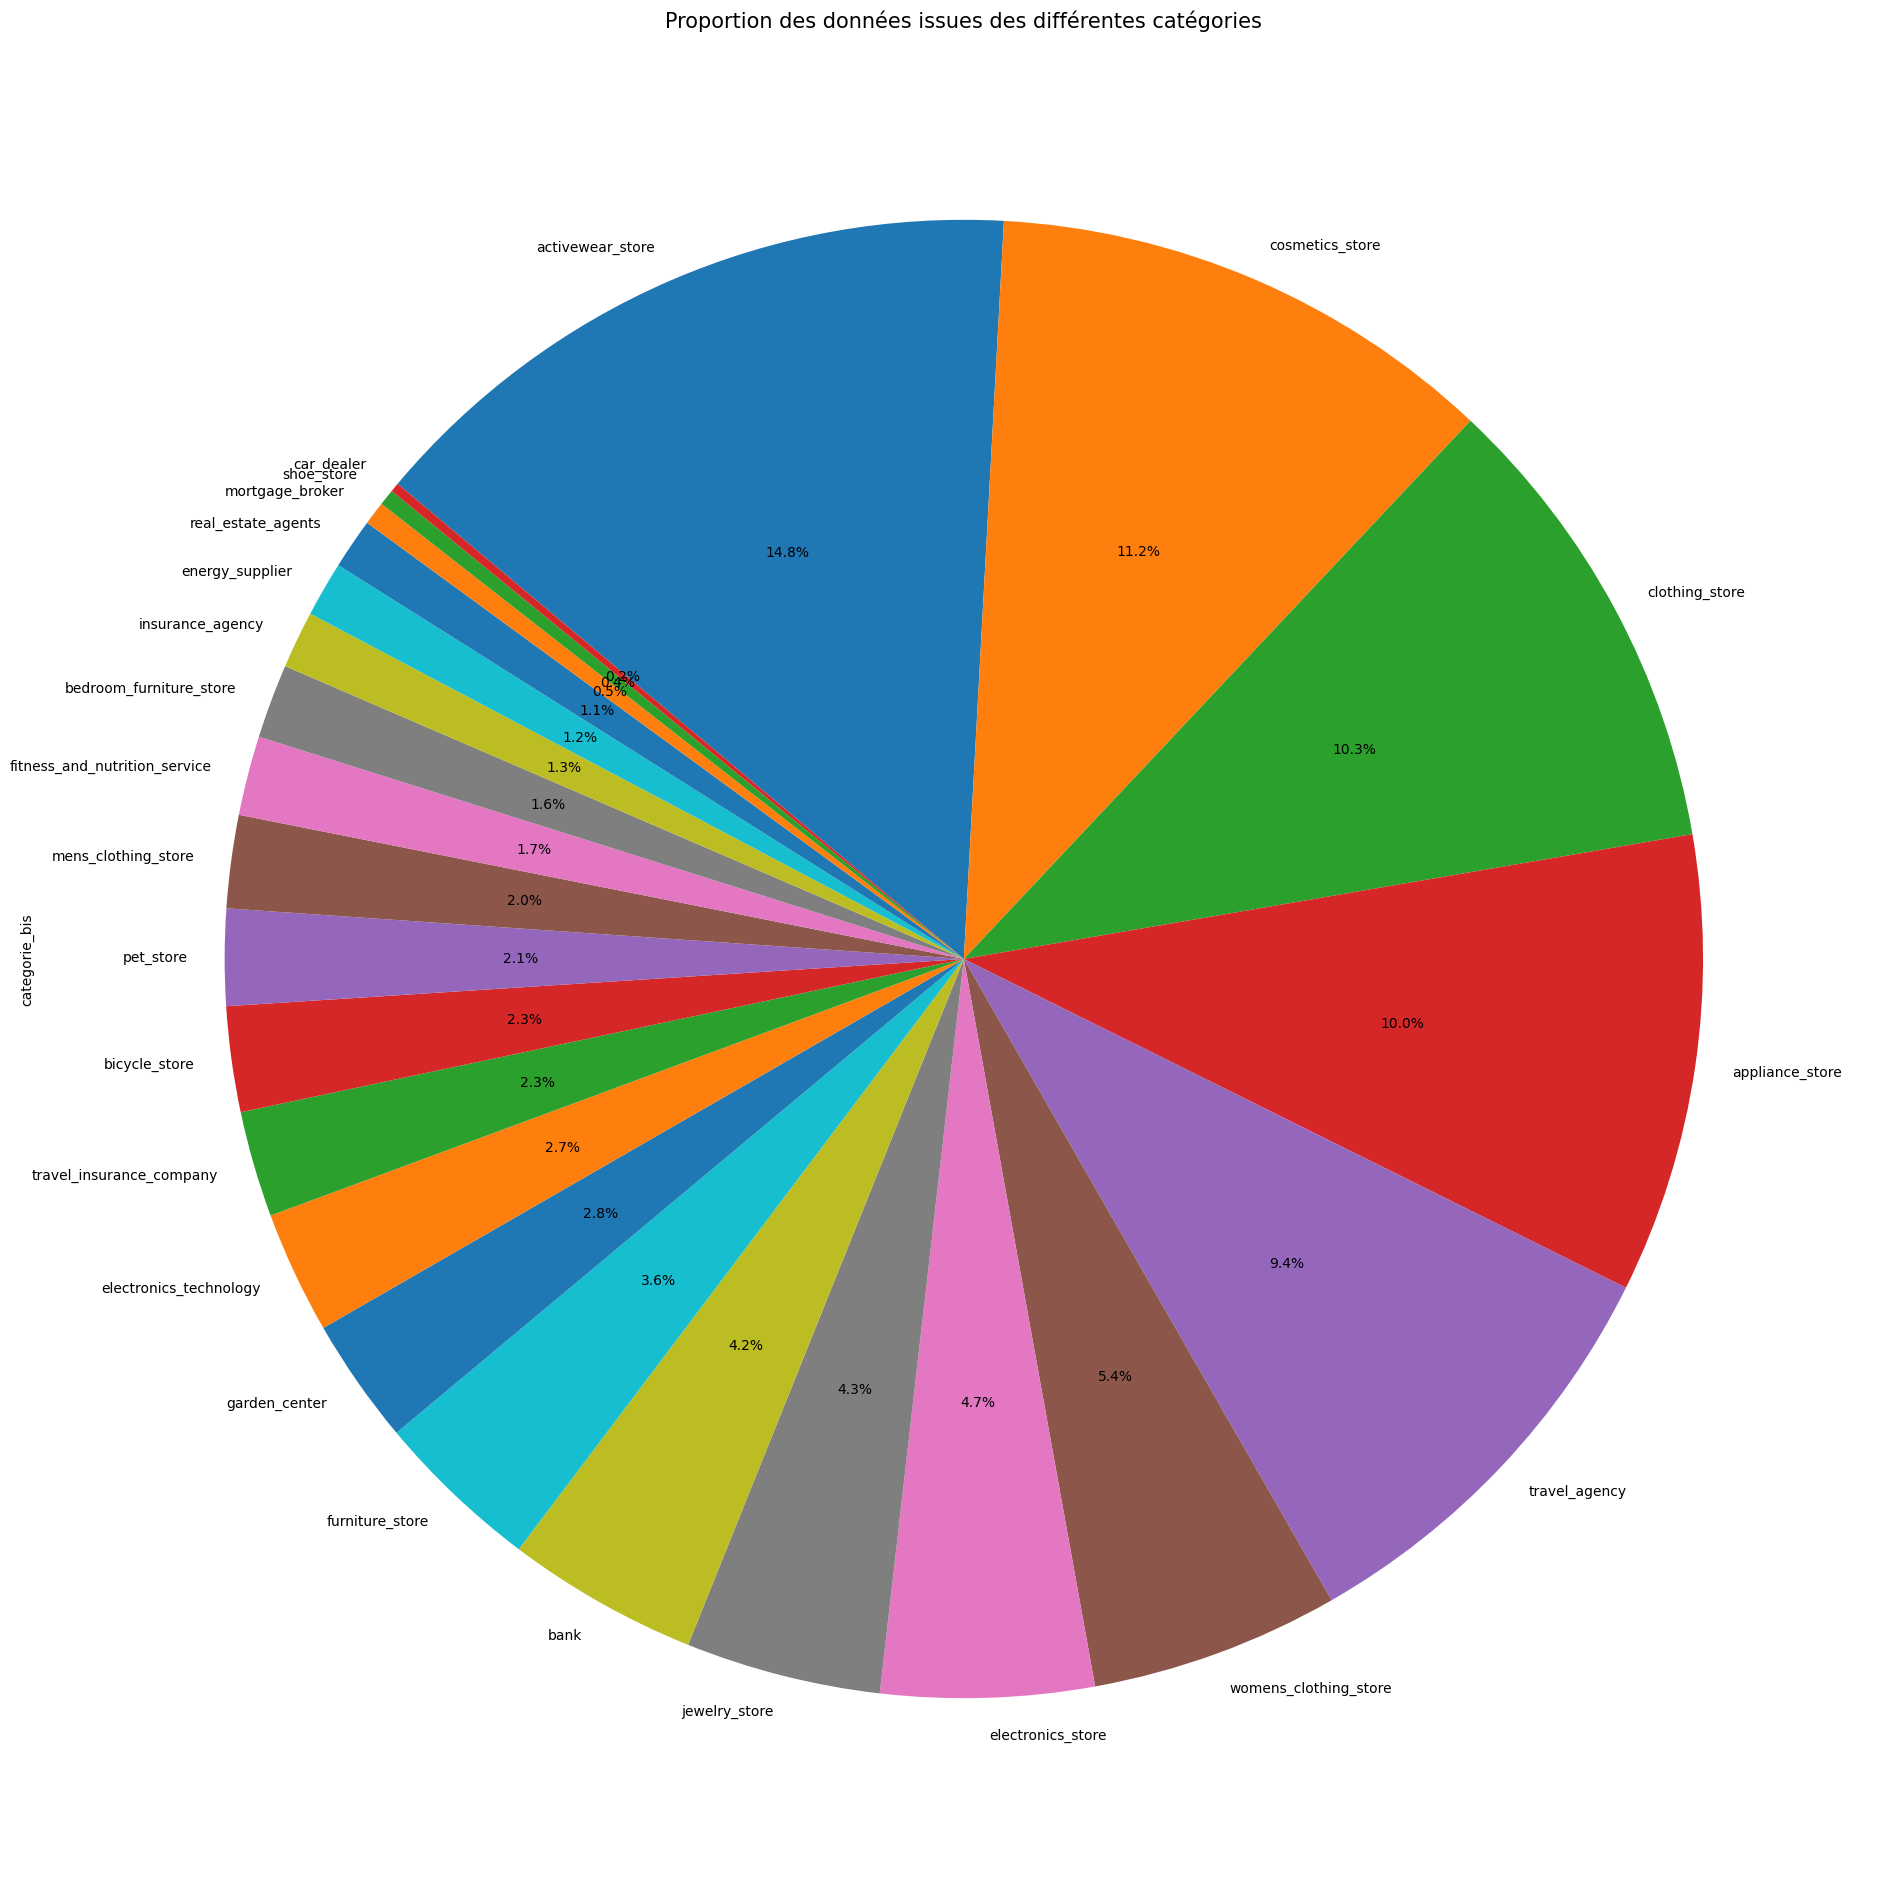

In [ ]:
plt.figure(figsize= (24,24))
df["categorie_bis"].value_counts(normalize=True).plot(kind='pie', labeldistance=1.05, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Proportion des données issues des différentes catégories', size= 15);



Les catégories les plus représentées sont: activewear_store (9658), cosmetics_store (7302), clothing_store (6728), appliance_store (6569), travel_agency (6138).

**Distribution des variables**


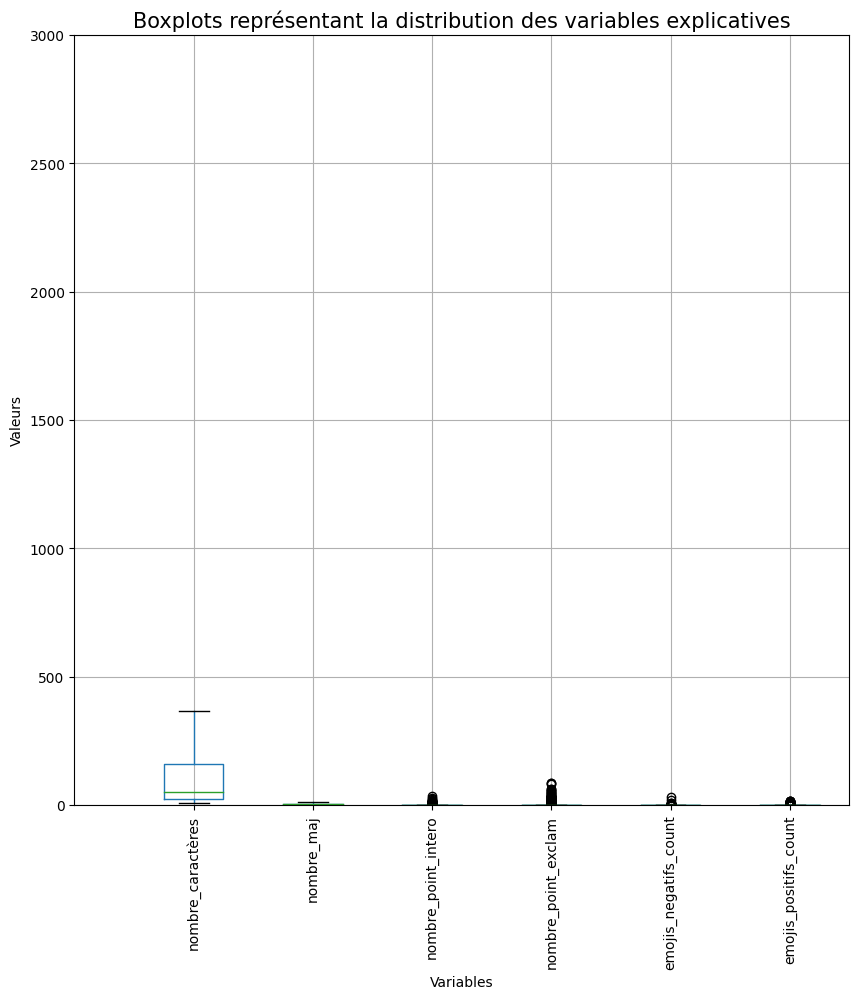

In [ ]:
# Dimension figure
plt.figure(figsize=(10,10))
# Séléction des variables
selected_columns = ["nombre_caractères","nombre_maj","nombre_point_intero", "nombre_point_exclam", "emojis_negatifs_count", "emojis_positifs_count"]

# Créez une figure avec les boxplots des colonnes sélectionnées
df[selected_columns].boxplot()

# Ajoutez un titre au graphe, des titres d'axes, rotation de la légende
plt.title('Boxplots représentant la distribution des variables explicatives', size=15)
plt.xlabel('Variables', size=10)
plt.ylabel('Valeurs', size= 10)
plt.xlim(0)
plt.ylim(0,3000)
plt.xticks(rotation= 90)

# Affichez la figure
plt.show()

Nous observons un boxplot très étendue pour la variable "nombre de caractère" suggérant la présence d'une grande variation dans la distribution de données.
Les boxplots des variables 'nombre de majuscules', 'nombre de smiley positif', 'nombre de smiley négatif', 'nombre de point d'interrogation' et 'nombre de point d'exclamation'sont plats suggérant des distributions de données présentant peu de variation.

De plus, on observe beaucoup de valeurs abérrantes/valeurs extrêmes pour le nombre de caractères et le nombre de majuscules.

==> ***Nous allons remplacer les valeurs aberrantes par le quartile supérieur.***

In [ ]:
## ajout ML pour remplacer les valeurs aberrantes par le quartile supérieur
df2 = df
# columns_VA = ["nombre_caractères","nombre_maj", "nombre_point_intero", "nombre_point_exclam", "emojis_negatifs_count", "emojis_positifs_count"]
# columns_VA = ["nombre_caractères"]

Q3 = df2['nombre_caractères'].quantile(0.75)
IQR = Q3 - df2['nombre_caractères'].quantile(0.25)
outliers = (df2['nombre_caractères'] > Q3 + 1.5 * IQR)
df2['nombre_caractères'].loc[outliers] = Q3
###############
Q3 = df2['nombre_maj'].quantile(0.75)
IQR = Q3 - df2['nombre_maj'].quantile(0.25)
outliers = (df2['nombre_maj'] > Q3 + 1.5 * IQR)
df2['nombre_maj'].loc[outliers] = Q3
# ###############
# Q3 = df2['nombre_point_intero'].quantile(0.75)
# IQR = Q3 - df2['nombre_point_intero'].quantile(0.25)
# outliers = (df2['nombre_point_intero'] > Q3 + 1.5 * IQR)
# df2['nombre_point_intero'].loc[outliers] = Q3
# ###############
# Q3 = df2['nombre_point_exclam'].quantile(0.75)
# IQR = Q3 - df2['nombre_point_exclam'].quantile(0.25)
# outliers = (df2['nombre_point_exclam'] > Q3 + 1.5 * IQR)
# df2['nombre_point_exclam'].loc[outliers] = Q3
# ###############
# Q3 = df2['emojis_negatifs_count'].quantile(0.75)
# IQR = Q3 - df2['emojis_negatifs_count'].quantile(0.25)
# outliers = (df2['emojis_negatifs_count'] > Q3 + 1.5 * IQR)
# df2['emojis_negatifs_count'].loc[outliers] = Q3
# ###############
# Q3 = df2['emojis_positifs_count'].quantile(0.75)
# IQR = Q3 - df2['emojis_positifs_count'].quantile(0.25)
# outliers = (df2['emojis_positifs_count'] > Q3 + 1.5 * IQR)
# df2['emojis_positifs_count'].loc[outliers] = Q3


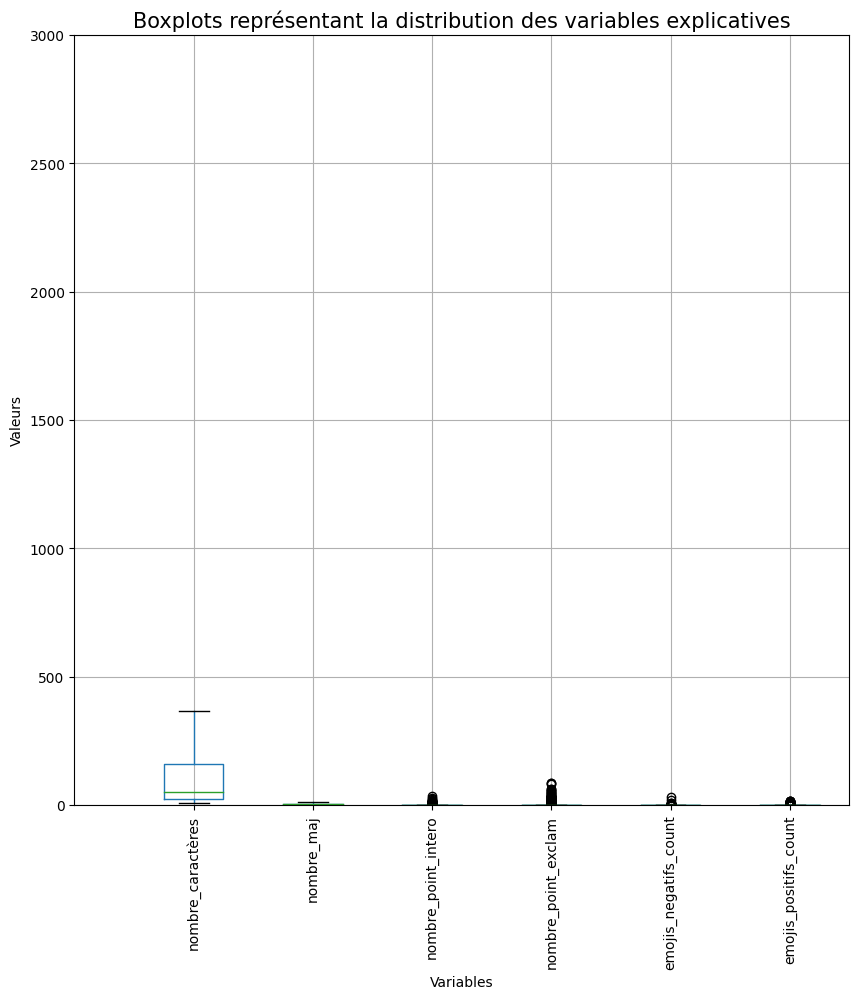

In [ ]:
# Dimension figure
plt.figure(figsize=(10,10))
# Séléction des variables
selected_columns = ["nombre_caractères","nombre_maj","nombre_point_intero", "nombre_point_exclam", "emojis_negatifs_count", "emojis_positifs_count"]

# Créez une figure avec les boxplots des colonnes sélectionnées
df[selected_columns].boxplot()

# Ajoutez un titre au graphe, des titres d'axes, rotation de la légende
plt.title('Boxplots représentant la distribution des variables explicatives', size=15)
plt.xlabel('Variables', size=10)
plt.ylabel('Valeurs', size= 10)
plt.xlim(0)
plt.ylim(0,3000)
plt.xticks(rotation= 90)

# Affichez la figure
plt.show()

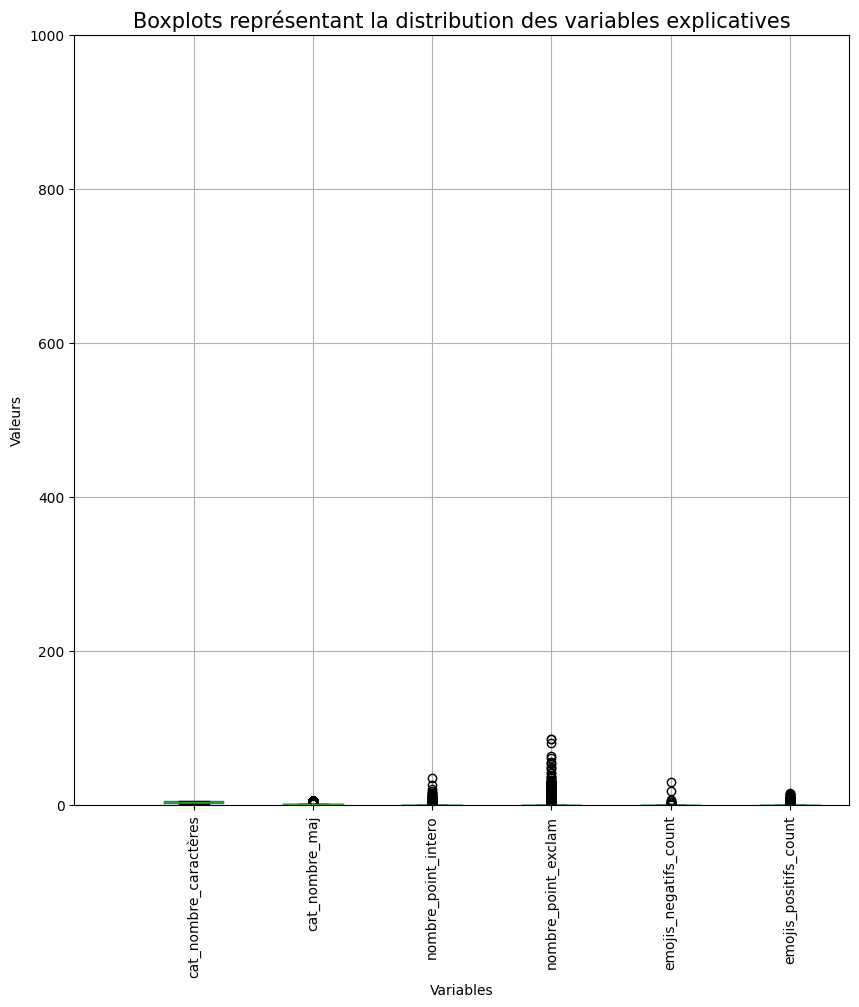

In [ ]:
# Dimension figure
plt.figure(figsize=(10,10))

# Séléction des variables
selected_columns = ['cat_nombre_caractères','cat_nombre_maj', 'nombre_point_intero', 'nombre_point_exclam', 'emojis_negatifs_count', 'emojis_positifs_count']

# Créez une figure avec les boxplots des colonnes sélectionnées
df[selected_columns].boxplot()

# Ajoutez un titre au graphe, des titres d'axes, rotation de la légende
plt.title('Boxplots représentant la distribution des variables explicatives', size=15)
plt.xlabel('Variables', size=10)
plt.ylabel('Valeurs', size= 10)
plt.xlim(0)
plt.ylim(0, 1000)
plt.xticks(rotation= 90)

# Affichez la figure
plt.show()


On observe des boxplots plat.
Cela indique une distribution de données où la plupart des observations sont très similaires les unes aux autres c'est à dire qu'il y a peu de variation.



**`Répartitions des notes `**



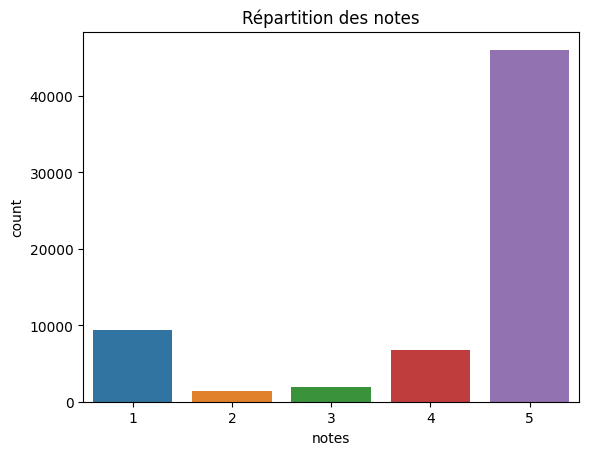

In [ ]:
 sns.countplot(x='notes', data = df)
plt.title('Répartition des notes');



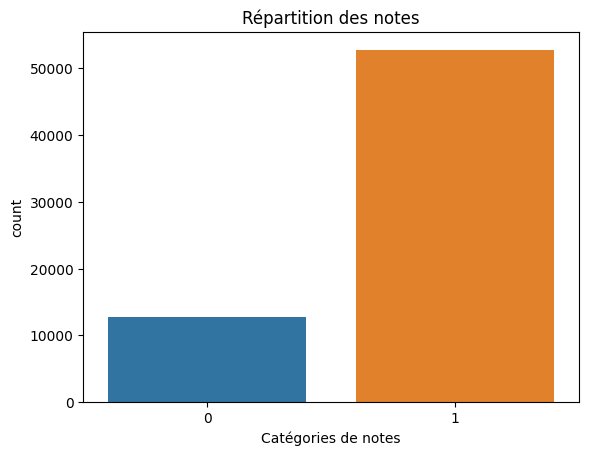

In [ ]:
sns.countplot(x='notes_bis', data = df)
plt.xlabel('Catégories de notes\n')
plt.title('Répartition des notes');

La majorité des notes attribués sont bonnes. Mais il y a quand même quelques mauvaises notes.
De plus, il y a très peu de notes intermédiares. Les clients donnent des notes extrêmes. Donc les clients sont soit très satisfait (5 = la majorité) soit très insatisfait (1).

=> La distribution des notes ne suit pas une loi normale. Elle est déséquilibrée ce qui suppose de pré-traiter les données avant l'étape de modélisation.

- Répartitions des notes par catégories

In [ ]:
notesca = df[['notes','categorie_bis']].groupby('categorie_bis').mean().sort_values(by='notes', ascending=False)
notesca.reset_index(0, inplace=True)
notesca.head(10)

categorie_bis     notes
0                mortgage_broker  4.841791
1                cosmetics_store  4.714051
2         electronics_technology  4.701484
3                appliance_store  4.688842
4  fitness_and_nutrition_service  4.674296
5                           bank  4.650291
6        bedroom_furniture_store  4.550847
7             real_estate_agents  4.548476
8                     car_dealer  4.541985
9                     shoe_store  4.493506

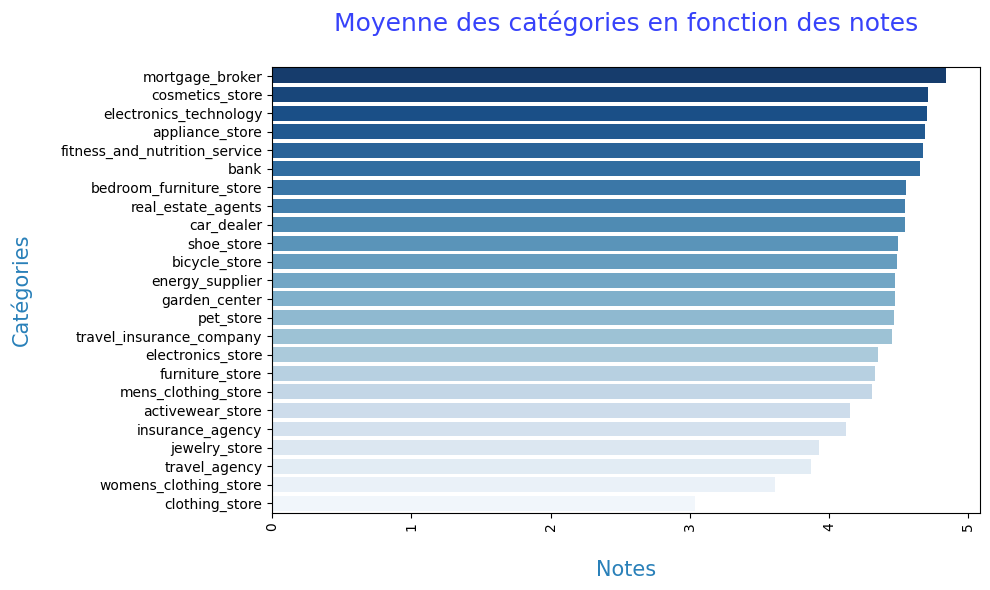

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x= notesca['notes'], y= notesca['categorie_bis'], palette="Blues_r")
plt.xlabel('\nNotes', fontsize=15, color='#2980b9')
plt.ylabel('Catégories\n', fontsize=15, color='#2980b9')
plt.title("Moyenne des catégories en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

En moyenne, les catégories les mieux notées sont: bank,bedroom_furniture_store, car_dealer, cosmetics_store, electronics_technology, real_estate_agents, fitness_and_nutrition_service, appliance_store, mortgage_broker. La catégorie la moins bien notée est clothing_store. Ce sont les catégories les moins bien notés qui seront ciblées par le modèle afin d'améliorer la satisfaction client.

- Répartition des notes par année


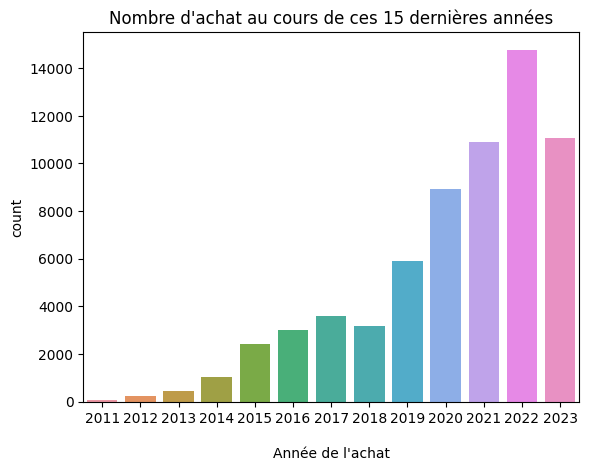

In [ ]:
  sns.countplot(x='année_experience', data=df);
  plt.xlabel("\nAnnée de l'achat")
  plt.title("Nombre d'achat au cours de ces 15 dernières années");

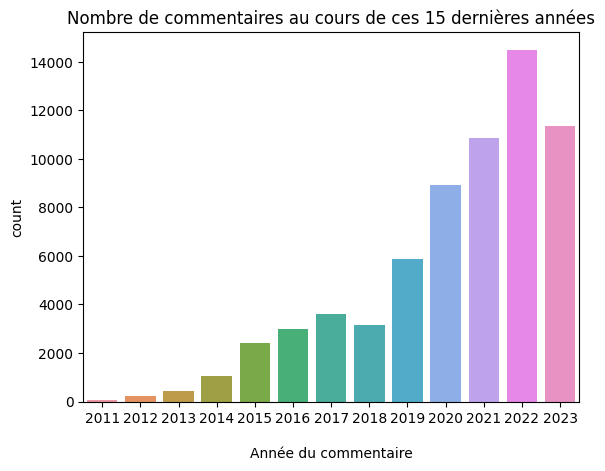

In [ ]:
  sns.countplot(x='année_commentaire', data=df);
  plt.xlabel('\nAnnée du commentaire')
  plt.title('Nombre de commentaires au cours de ces 15 dernières années');

Le nombre d'achat a augmenté au cours de ces 15 dernières années avec une forte augmentation durant la période COVID (2020,2021, 2022, 2023).
Cette augmentation s'accompagne d'une augmentation du nombre d'avis au cours de ces 15 années.

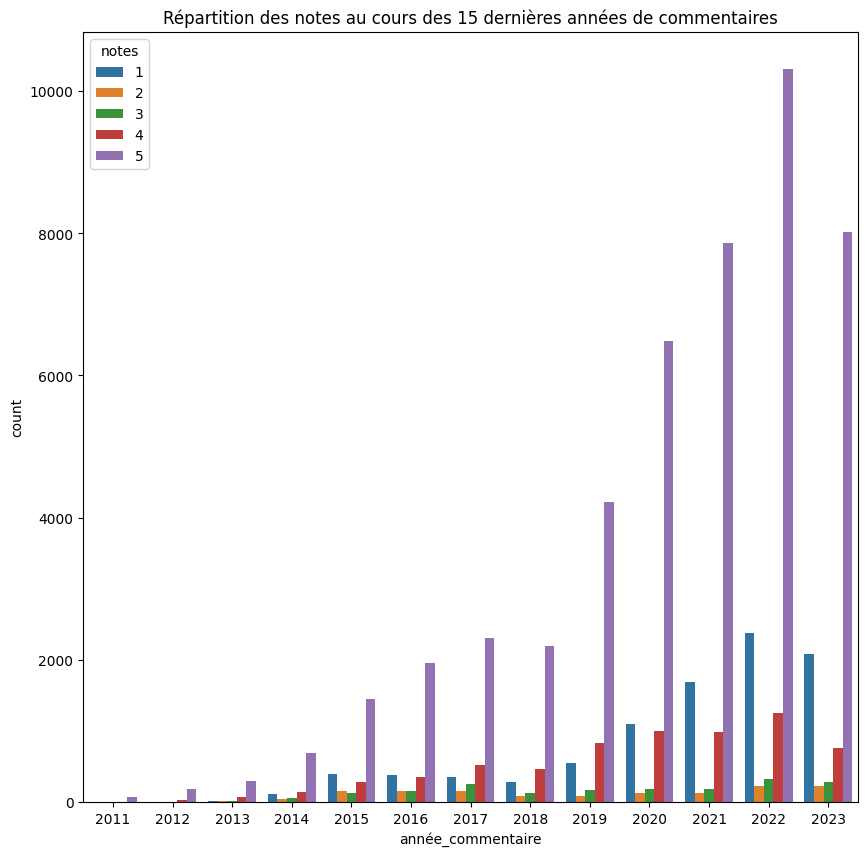

In [ ]:
  plt.figure(figsize=(10,10))
  sns.countplot(x='année_commentaire', hue='notes', data=df);
  plt.title('Répartition des notes au cours des 15 dernières années de commentaires');

Il y a une forte augmentation de très bonnes notes (5) au cours des années. Il y a également une augmentation un peu moins marquée de bonnes notes (4) et de très mauvaises notes (1). Enfin, le nombre de note 2, 3 ne varie pas énormément. Donc, les clients sont de plus en plus satisfaits au cours des années.

De plus, on observe une répartition globale des notes similaire au cours des années: il y a une majorité de notes très positives (5), un peu moins de notes très négatives (1) et très peu de notes intermédiaires. Ce sont les notes négatives que l'on ciblera dans ce modèle.

- Répartition des notes par mois

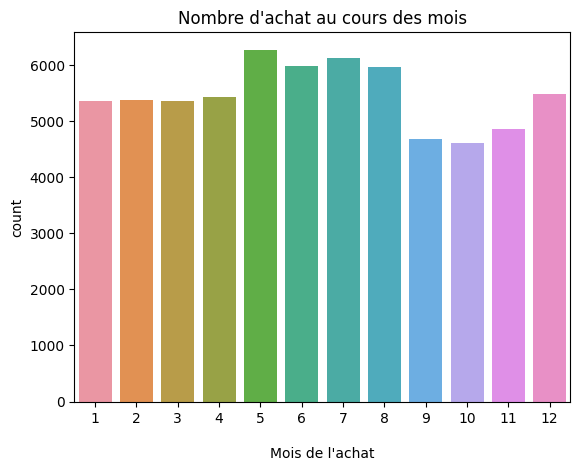

In [ ]:
  sns.countplot(x='mois_experience', data=df);
  plt.xlabel("\nMois de l'achat")
  plt.title("Nombre d'achat au cours des mois");

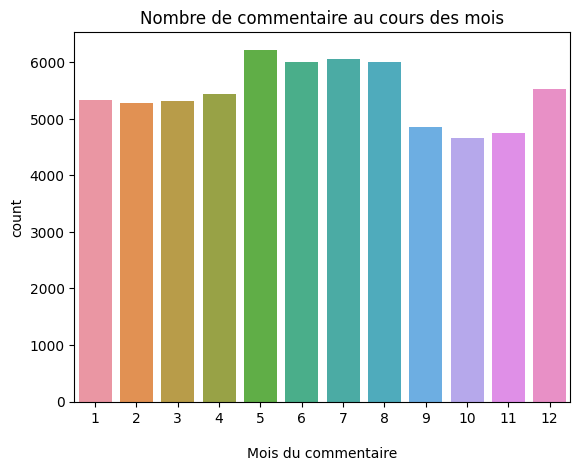

In [ ]:
  sns.countplot(x='mois_commentaire', data=df);
  plt.xlabel('\nMois du commentaire')
  plt.title('Nombre de commentaire au cours des mois');

On observe que le nombre d'achat est plus important pendant les mois de mai, juin, juillet et août. La même distribution est observée concernant le nombre de commentaire associé.

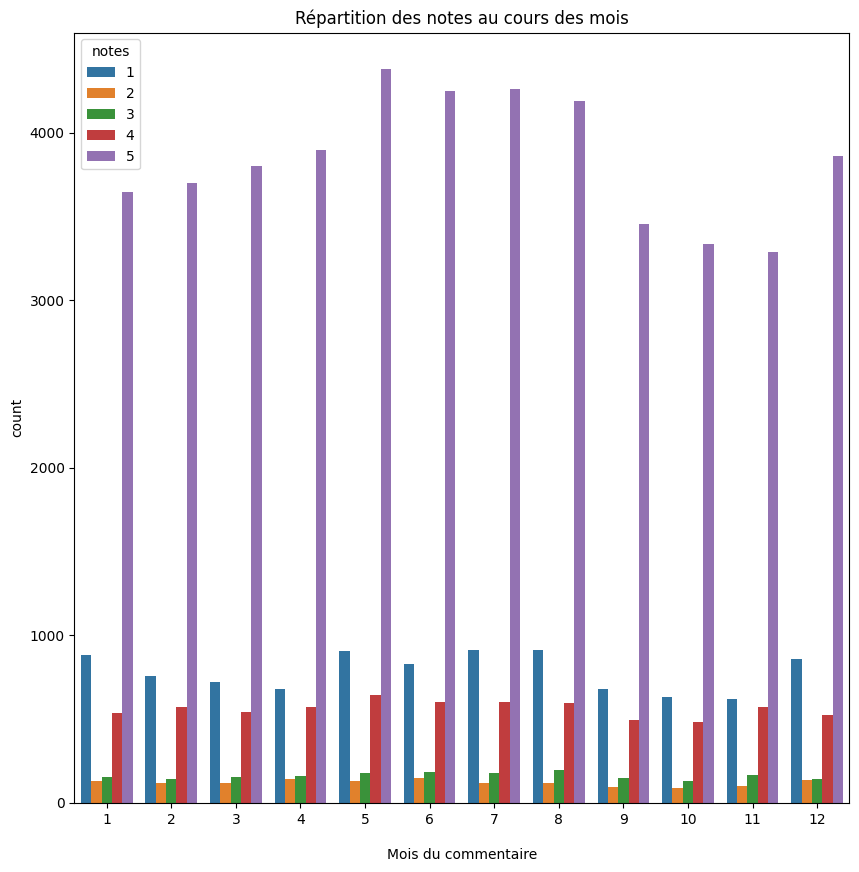

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='mois_commentaire', hue='notes', data=df);
plt.xlabel('\nMois du commentaire')
plt.title('Répartition des notes au cours des mois');

On observe la même proportion de chaque note en fonction des mois donc il n'y a pas eu de différence de notation au cours des mois. La satisfaction client semble rester stable.

- Répartition des notes en fonction du nombre de caractères dans le commentaire






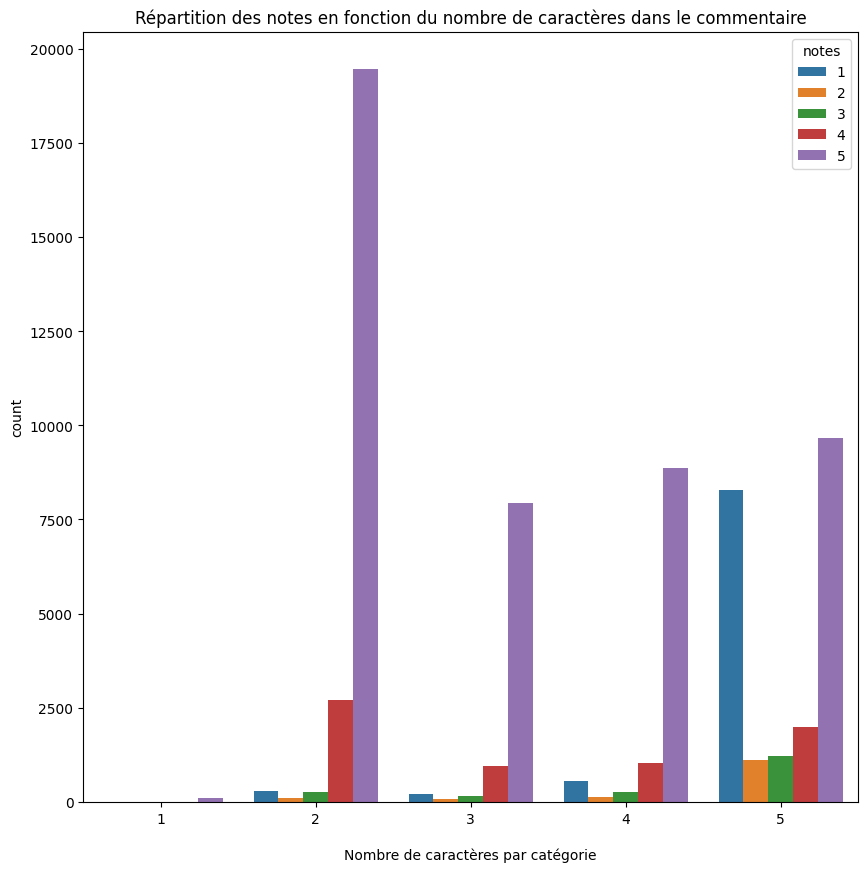

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='cat_nombre_caractères', hue='notes', data=df);
plt.xlabel('\nNombre de caractères par catégorie')
plt.title('Répartition des notes en fonction du nombre de caractères dans le commentaire');

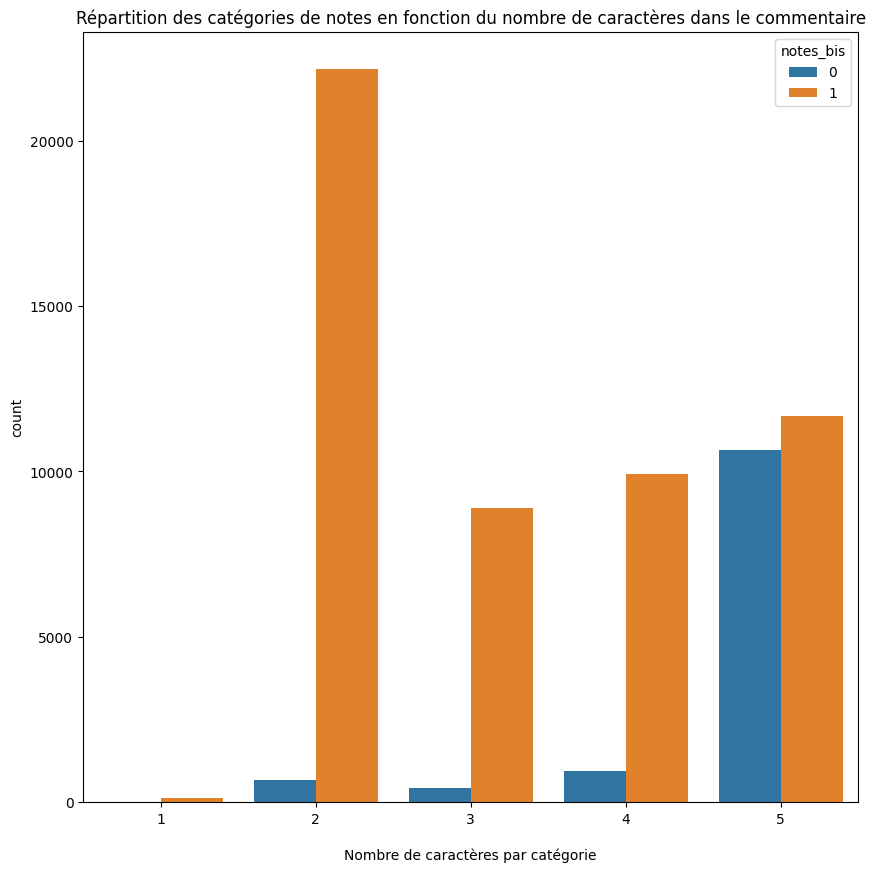

In [ ]:
  plt.figure(figsize=(10,10))
  sns.countplot(x='cat_nombre_caractères', hue='notes_bis', data=df);
  plt.xlabel('\nNombre de caractères par catégorie')
  plt.title('Répartition des catégories de notes en fonction du nombre de caractères dans le commentaire');

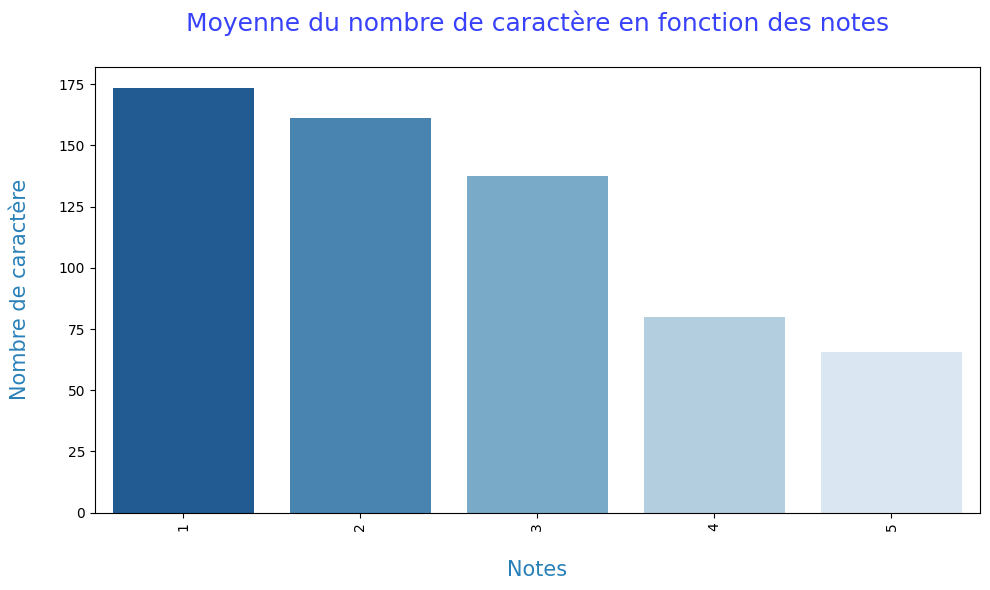

In [ ]:
notescar = df[['nombre_caractères','notes']].groupby('notes').mean().sort_values(by='nombre_caractères', ascending=False)
notescar.reset_index(0, inplace=True)
notescar.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notescar['notes'], y= notescar['nombre_caractères'], palette="Blues_r")
plt.xlabel('\nNotes', fontsize=15, color='#2980b9')
plt.ylabel('Nombre de caractère\n', fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de caractère en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

Plus la note est faible et plus le nombre de caractère augmente afin d'expliquer le contexte du problème.
Le nombre de caractère du commentaire semble avoir une influence sur la note du commentaire.

- Répartition des notes en fonctions du nombre de majuscules dans le commentaire


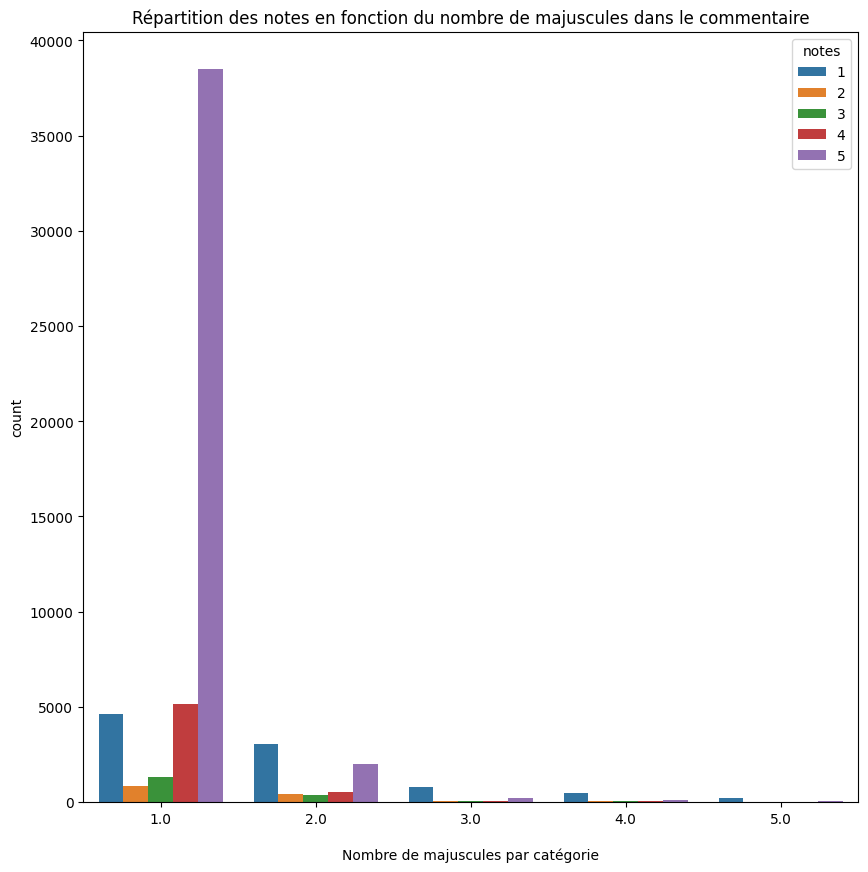

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='cat_nombre_maj', hue='notes', data=df);
plt.xlabel('\nNombre de majuscules par catégorie')
plt.title('Répartition des notes en fonction du nombre de majuscules dans le commentaire');

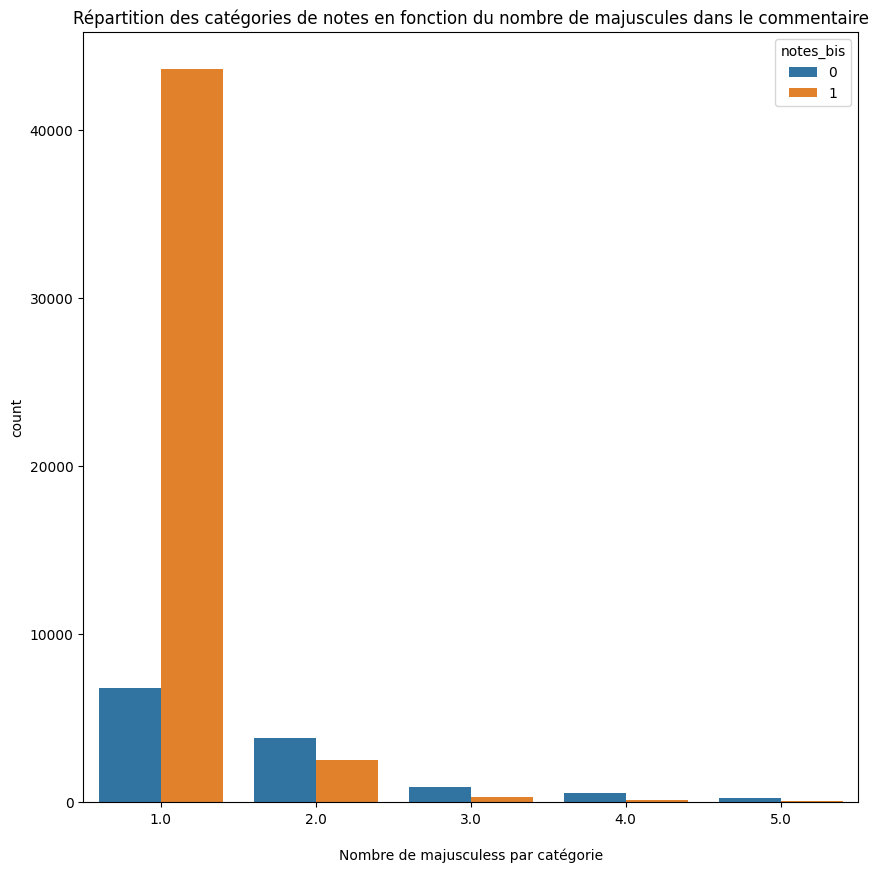

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='cat_nombre_maj', hue='notes_bis', data=df);
plt.xlabel('\nNombre de majusculess par catégorie')
plt.title('Répartition des catégories de notes en fonction du nombre de majuscules dans le commentaire');

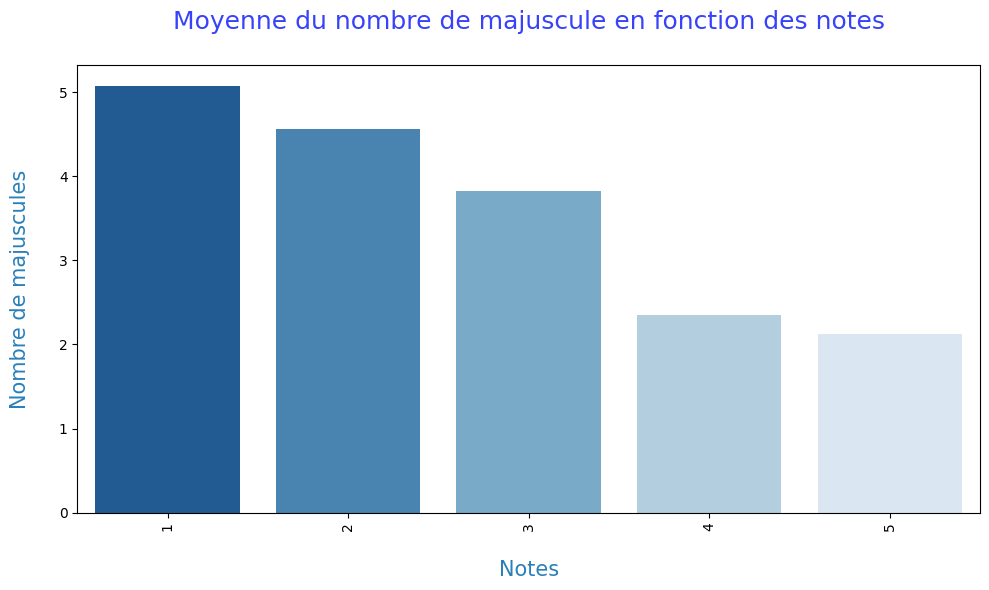

In [ ]:
notesmaj = df[['nombre_maj','notes']].groupby('notes').mean().sort_values(by='nombre_maj', ascending=False)
notesmaj.reset_index(0, inplace=True)
notesmaj.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notesmaj['notes'], y= notesmaj['nombre_maj'], palette="Blues_r")
plt.xlabel('\nNotes', fontsize=15, color='#2980b9')
plt.ylabel('Nombre de majuscules\n', fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de majuscule en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

Plus la note est faible et plus le nombre de majuscules augmente.

-Repartition des notes en fonction des émojis positifs

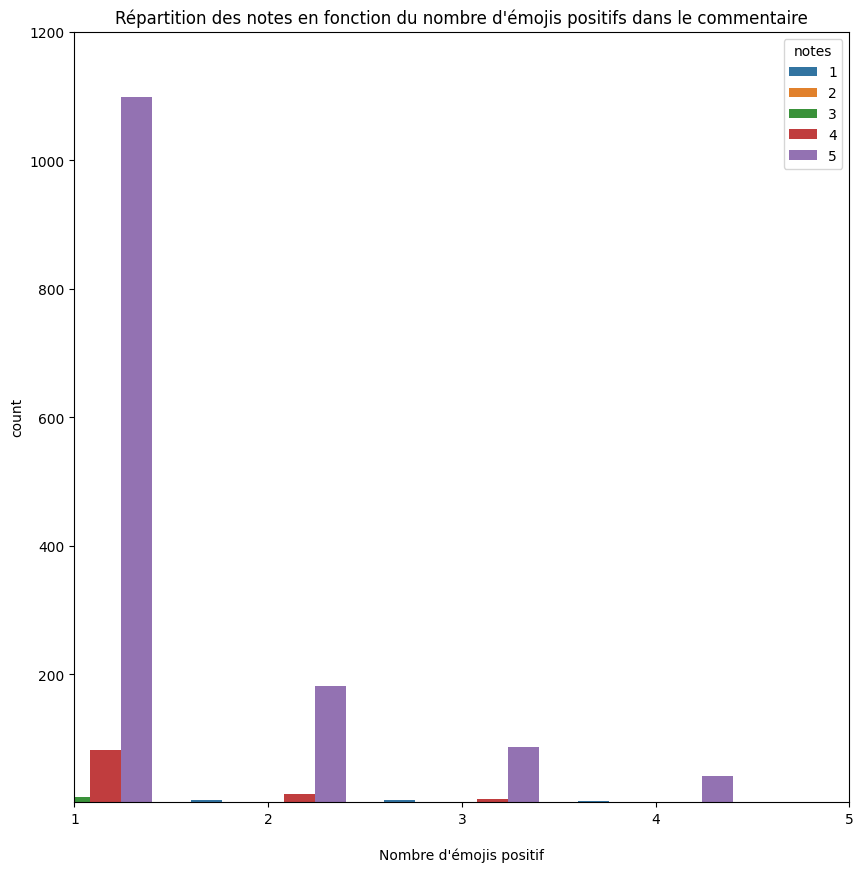

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='emojis_positifs_count', hue='notes', data=df);
plt.xlabel("\nNombre d'émojis positif")
plt.xlim(1, 5)
plt.ylim(1, 1200)
plt.title("Répartition des notes en fonction du nombre d'émojis positifs dans le commentaire");


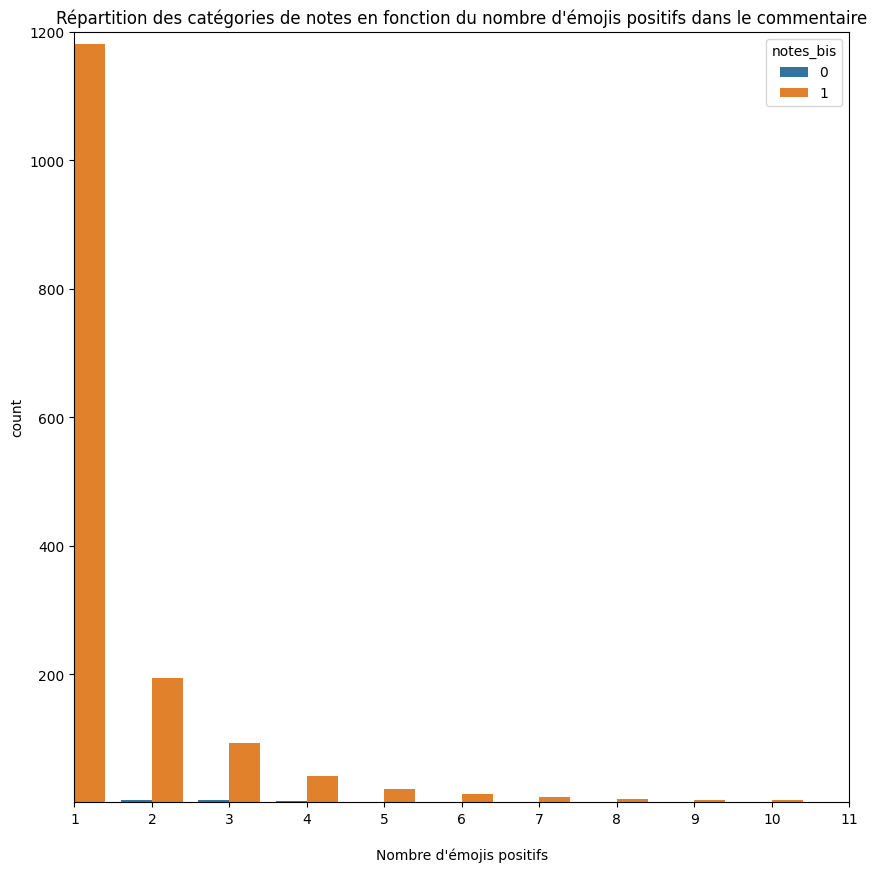

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='emojis_positifs_count', hue='notes_bis', data=df);
plt.xlabel("\nNombre d'émojis positifs")
plt.xlim(1, 11)
plt.ylim(1, 1200)
plt.title("Répartition des catégories de notes en fonction du nombre d'émojis positifs dans le commentaire");


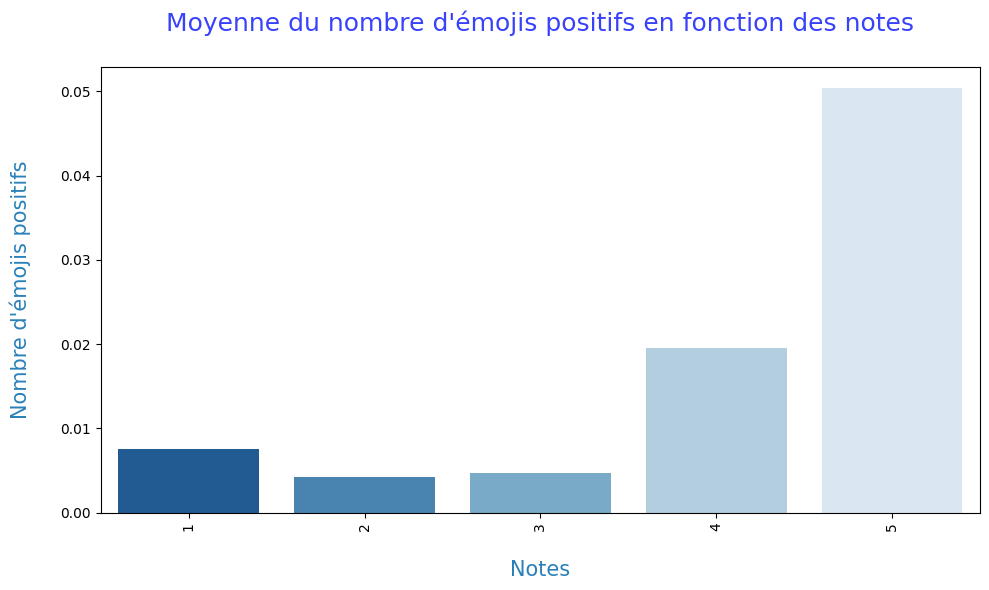

In [ ]:
notespo = df[['emojis_positifs_count','notes']].groupby('notes').mean().sort_values(by='emojis_positifs_count', ascending=False)
notespo.reset_index(0, inplace=True)
notespo.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notespo['notes'], y= notespo['emojis_positifs_count'], palette="Blues_r")
plt.xlabel("\nNotes", fontsize=15, color='#2980b9')
plt.ylabel("Nombre d'émojis positifs\n", fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre d'émojis positifs en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

Les émojis positifs sont utilisés en moyenne que pour des notes positifs.



-Repartition des notes en fonction des émojis négatifs

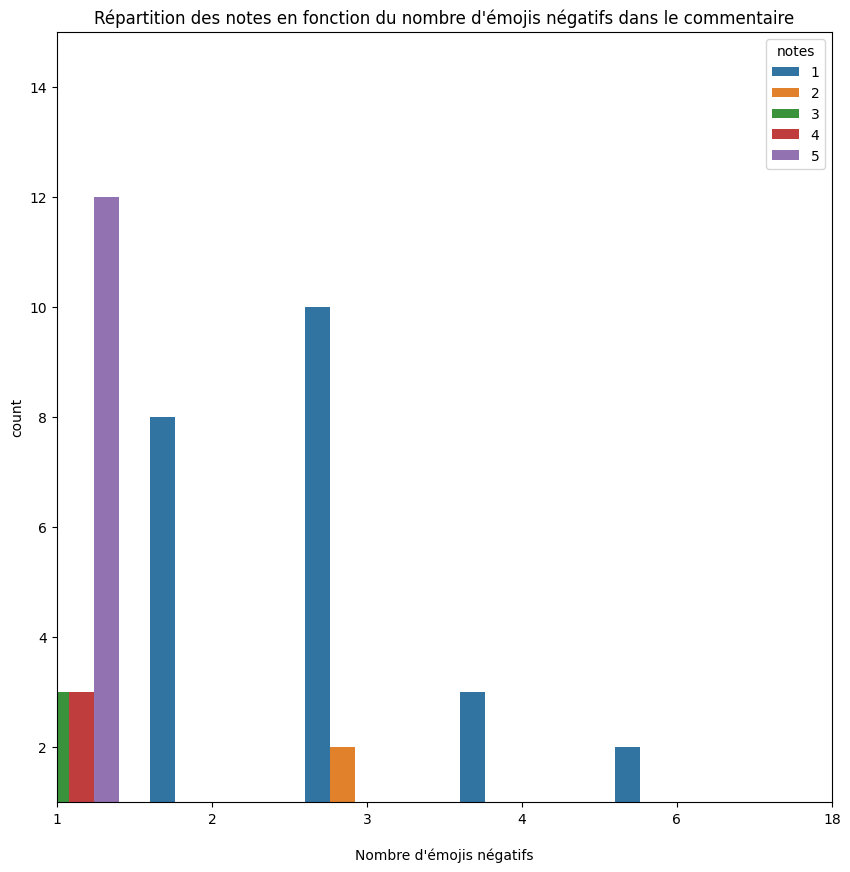

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='emojis_negatifs_count', hue='notes', data=df);
plt.xlabel("\nNombre d'émojis négatifs")
plt.xlim(1, 6)
plt.ylim(1, 15)
plt.title("Répartition des notes en fonction du nombre d'émojis négatifs dans le commentaire");


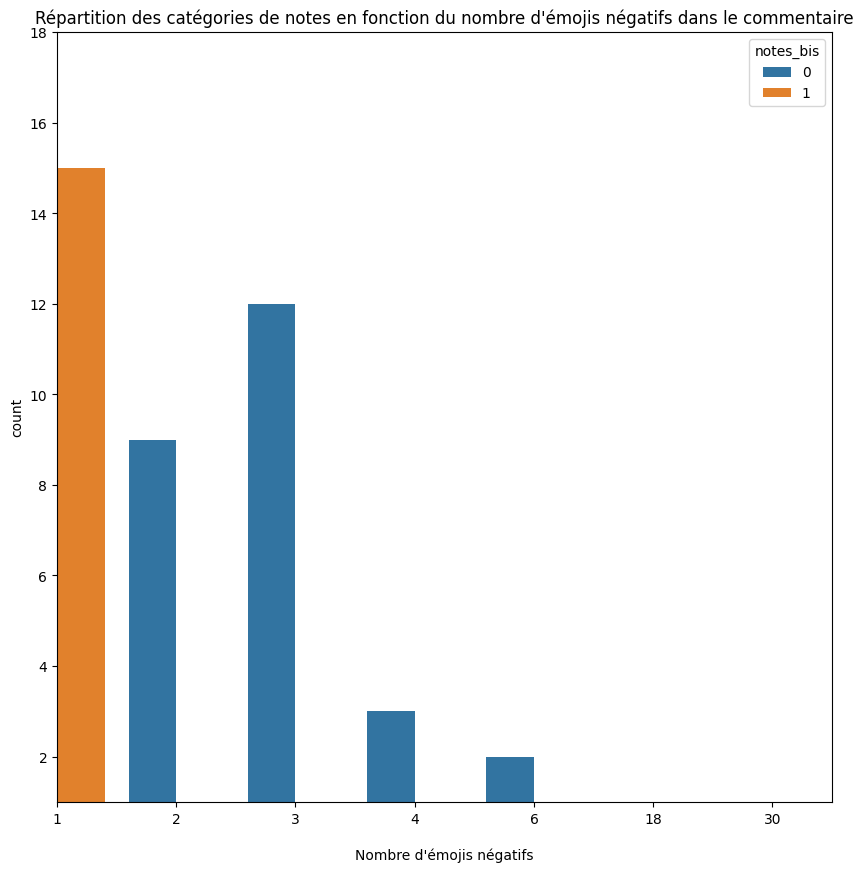

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='emojis_negatifs_count', hue='notes_bis', data=df);
plt.xlabel("\nNombre d'émojis négatifs")
plt.xlim(1)
plt.ylim(1, 18)
plt.title("Répartition des catégories de notes en fonction du nombre d'émojis négatifs dans le commentaire");


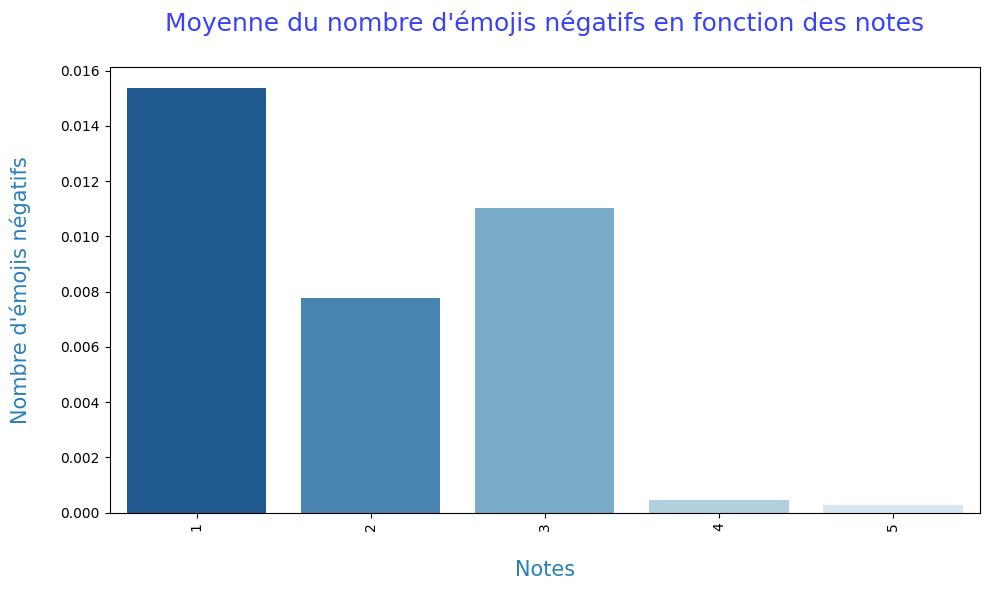

In [ ]:
notesne = df[['emojis_negatifs_count','notes']].groupby('notes').mean().sort_values(by='emojis_negatifs_count', ascending=False)
notesne.reset_index(0, inplace=True)
notesne.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notesne['notes'], y= notesne['emojis_negatifs_count'], palette="Blues_r")
plt.xlabel("\nNotes", fontsize=15, color='#2980b9')
plt.ylabel("Nombre d'émojis négatifs\n", fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre d'émojis négatifs en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

Les émojis négatifs sont utilisés en moyenne que pour des notes négatifs.



-Repartition des notes en fonction du nombre de point d'interrogation




In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='nombre_point_intero', hue='notes', data=df);
plt.xlabel("\nNombre de point d'interrogation")
plt.xlim(1,6)
plt.ylim(1)
plt.title("Répartition des notes en fonction du nombre de point d'interrogation dans le commentaire");


NameError: ignored

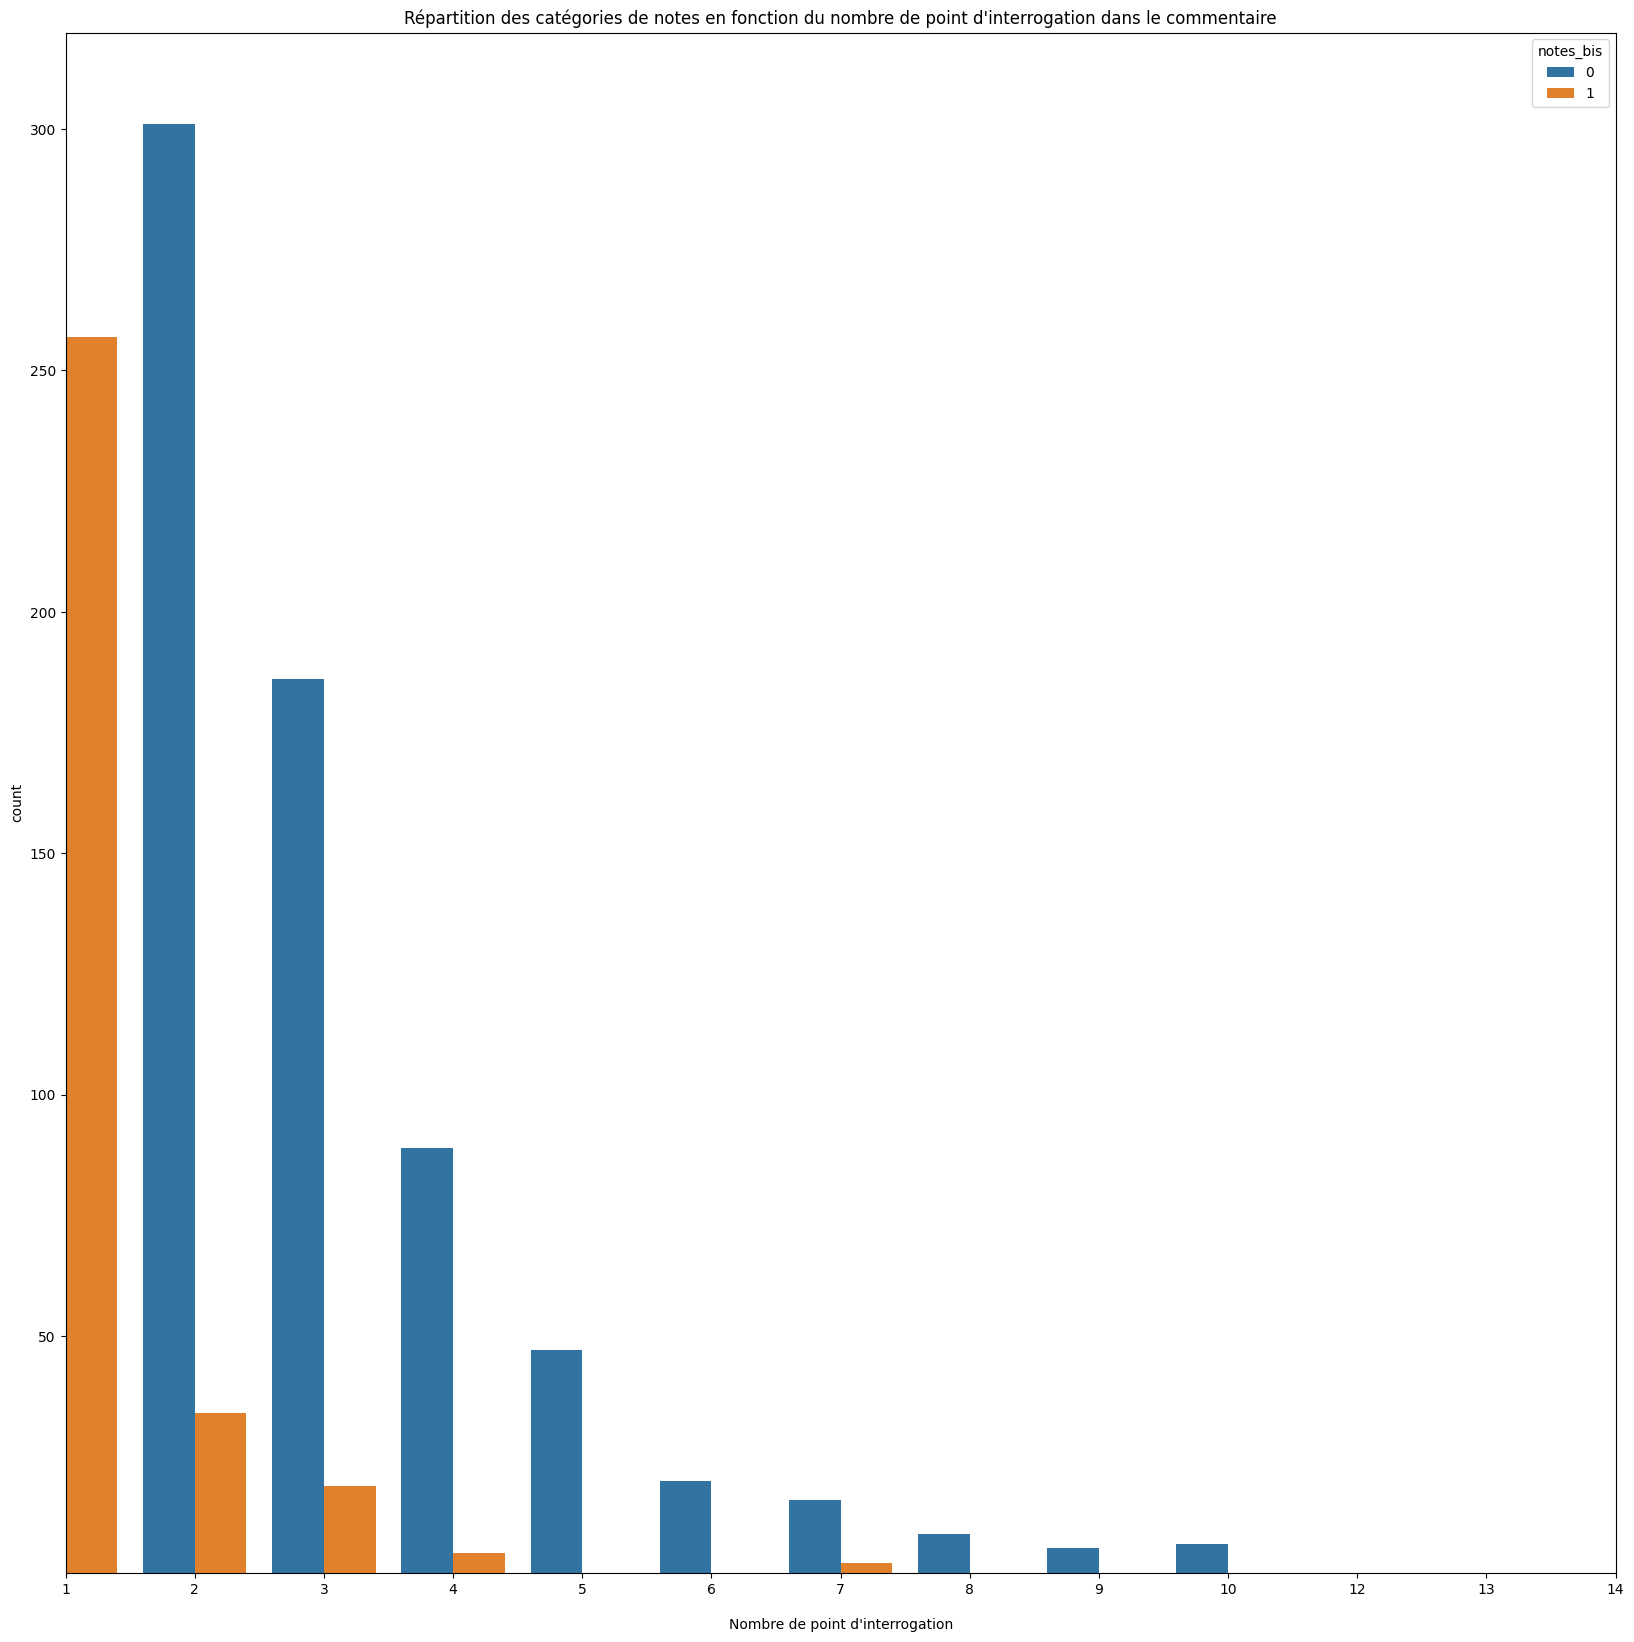

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='nombre_point_intero', hue='notes_bis', data=df);
plt.xlabel("\nNombre de point d'interrogation")
plt.xlim(1,13)
plt.ylim(1, 320)
plt.title("Répartition des catégories de notes en fonction du nombre de point d'interrogation dans le commentaire");


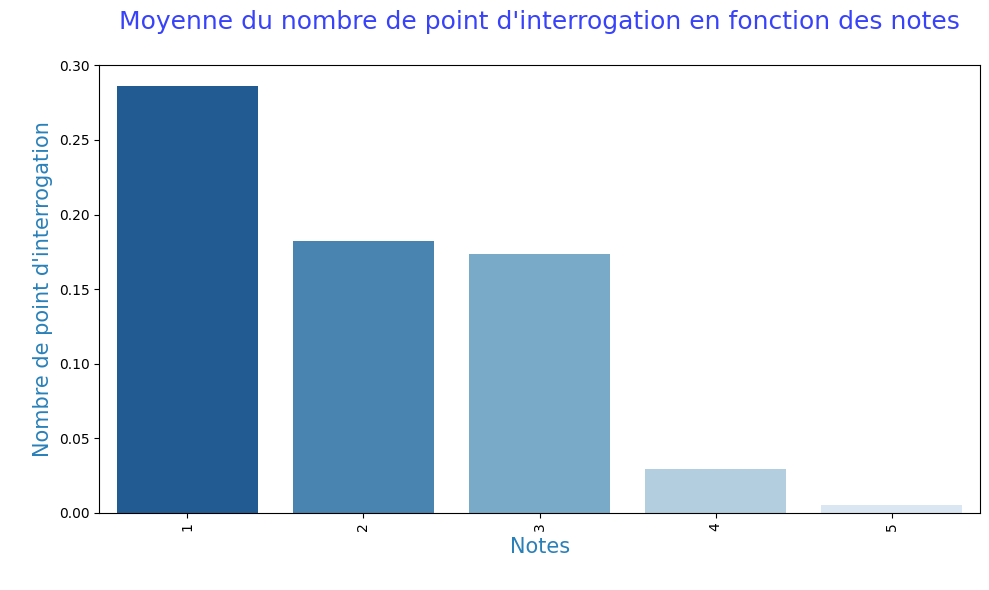

In [ ]:
notesint = df[['nombre_point_intero','notes']].groupby('notes').mean().sort_values(by='nombre_point_intero', ascending=False)
notesint.reset_index(0, inplace=True)
notesint.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notesint['notes'], y= notesint['nombre_point_intero'], palette="Blues_r")
plt.xlabel('Notes\n', fontsize=15, color='#2980b9')
plt.ylabel("\nNombre de point d'interrogation", fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de point d'interrogation en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

Le nombre de point d'interrogation est plus important pour les notes négatifs que pour les notes positives.


-Repartition des notes en fonction du nombre de point d'exclamation

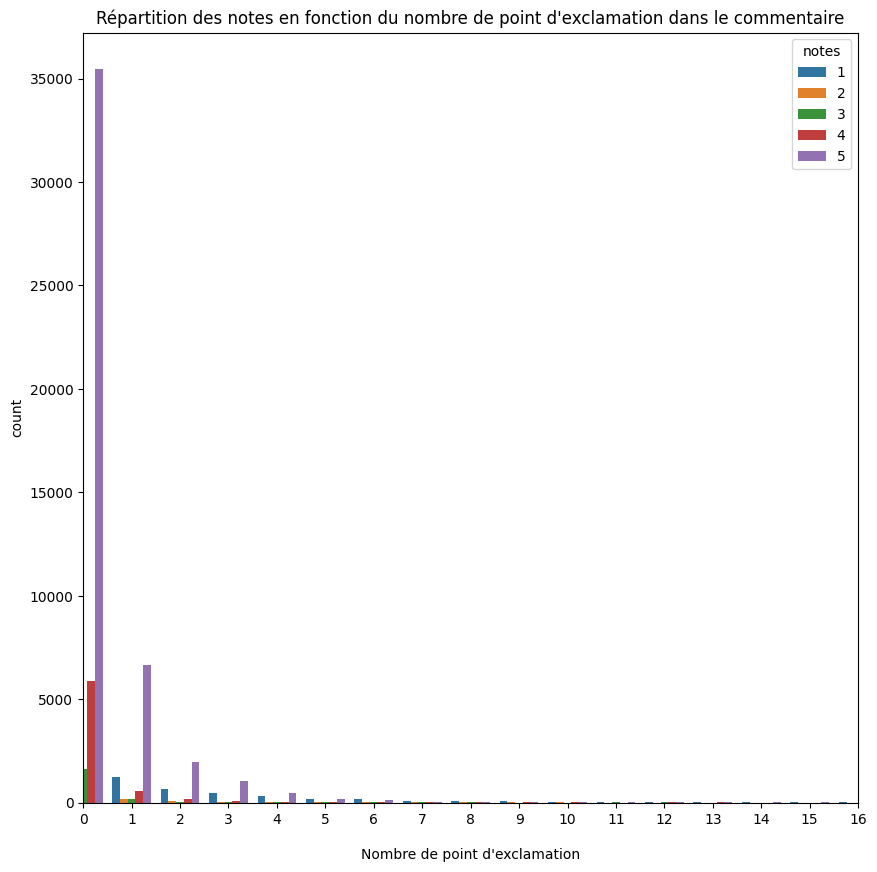

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='nombre_point_exclam', hue='notes', data=df);
plt.xlabel("\nNombre de point d'exclamation")
plt.xlim(0,16)
plt.ylim(0)
plt.title("Répartition des notes en fonction du nombre de point d'exclamation dans le commentaire");


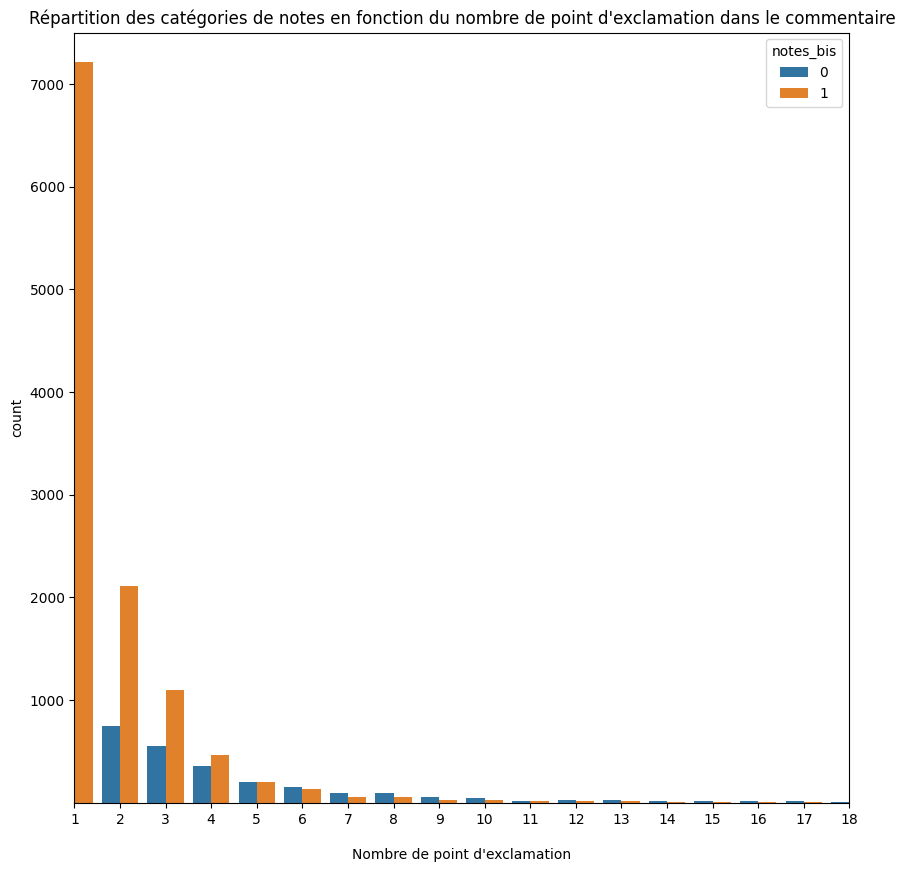

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='nombre_point_exclam', hue='notes_bis', data=df);
plt.xlabel("\nNombre de point d'exclamation")
plt.xlim(1, 18)
plt.ylim(1, 7500)
plt.title("Répartition des catégories de notes en fonction du nombre de point d'exclamation dans le commentaire");


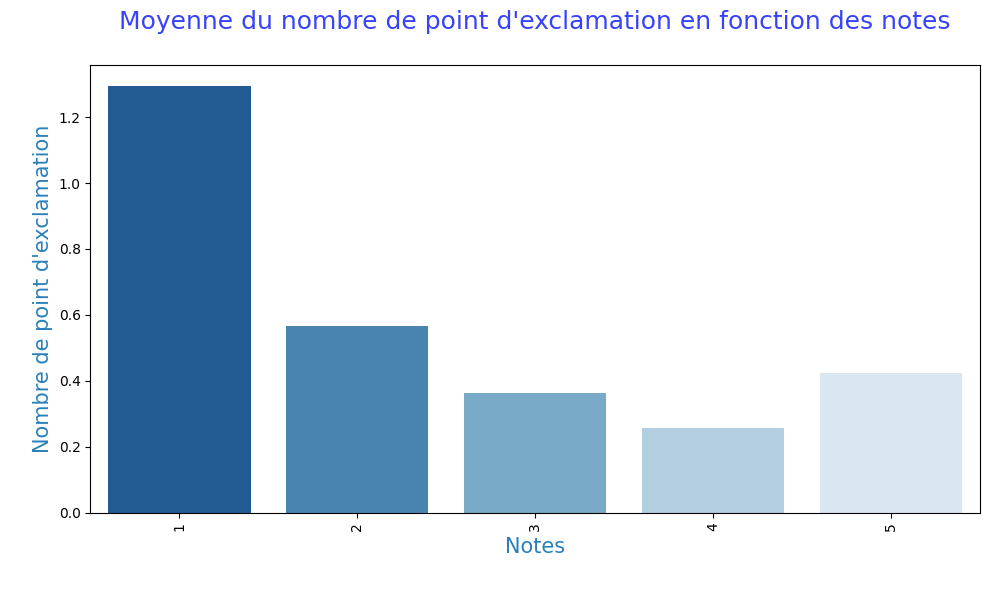

In [ ]:
notesexc = df[['nombre_point_exclam','notes']].groupby('notes').mean().sort_values(by='nombre_point_exclam', ascending=False)
notesexc.reset_index(0, inplace=True)
notesexc.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notesexc['notes'], y= notesexc['nombre_point_exclam'], palette="Blues_r")
plt.xlabel('Notes\n', fontsize=15, color='#2980b9')
plt.ylabel("\nNombre de point d'exclamation", fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de point d'exclamation en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

En moyenne plus la note est faible et plus le nombre de point d'exclamation augmente.

-Repartition des notes en fonction de la présence ou non d'une réponse aux commentaires

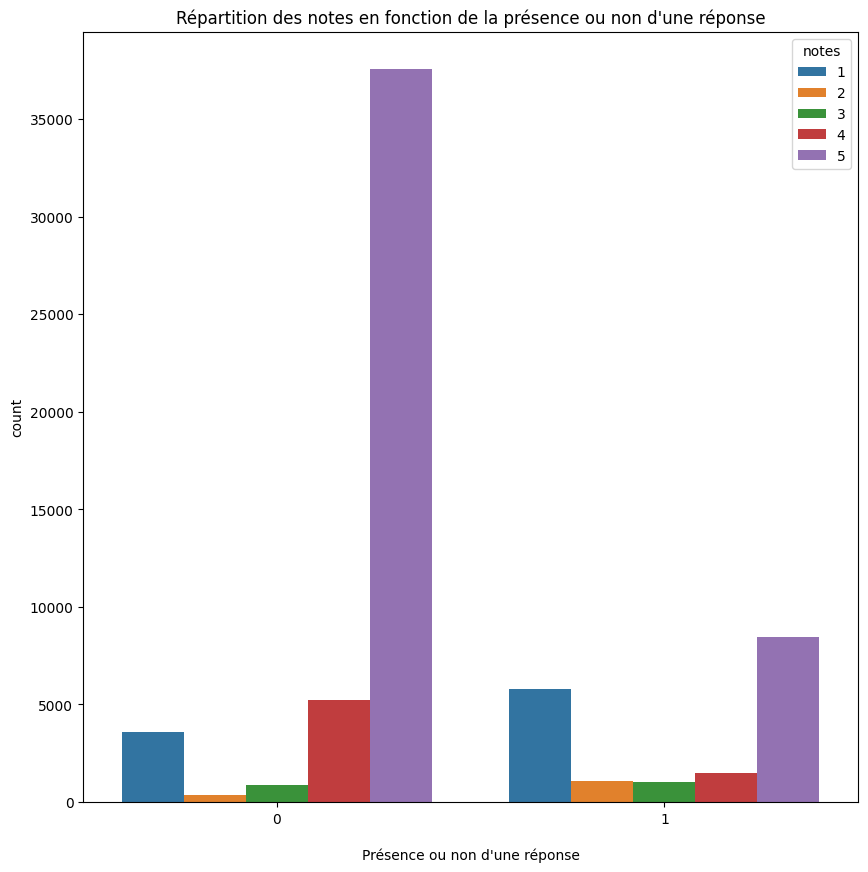

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='verif_reponses', hue='notes', data=df);
plt.xlabel("\nPrésence ou non d'une réponse")
plt.title("Répartition des notes en fonction de la présence ou non d'une réponse");


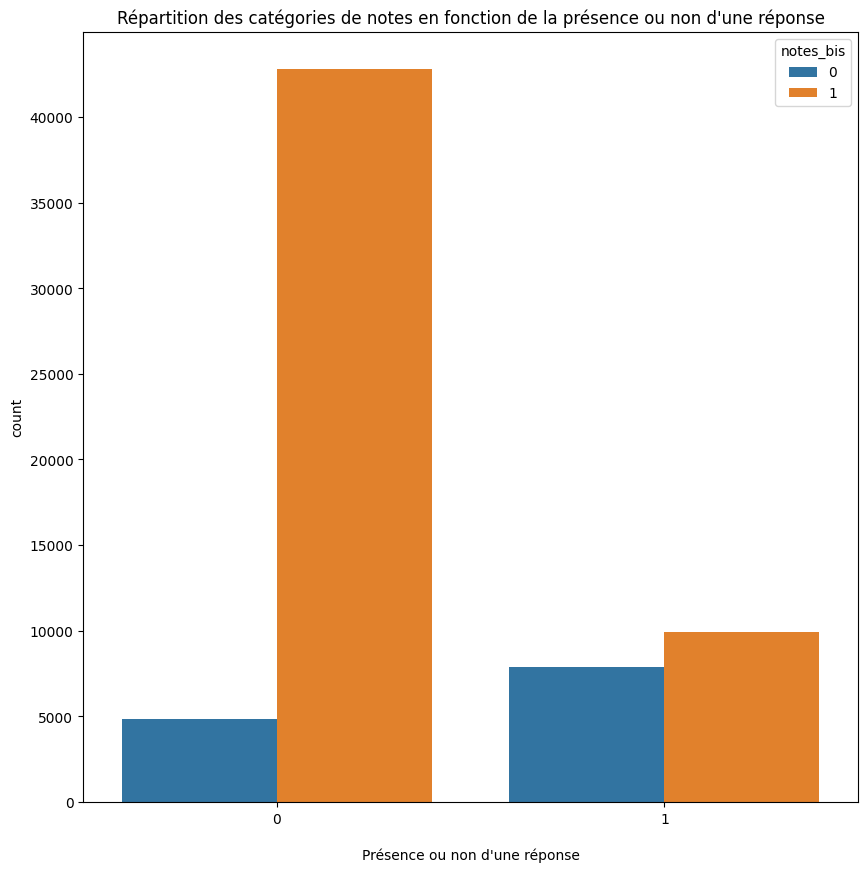

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='verif_reponses', hue='notes_bis', data=df);
plt.xlabel("\nPrésence ou non d'une réponse")
plt.title("Répartition des catégories de notes en fonction de la présence ou non d'une réponse");


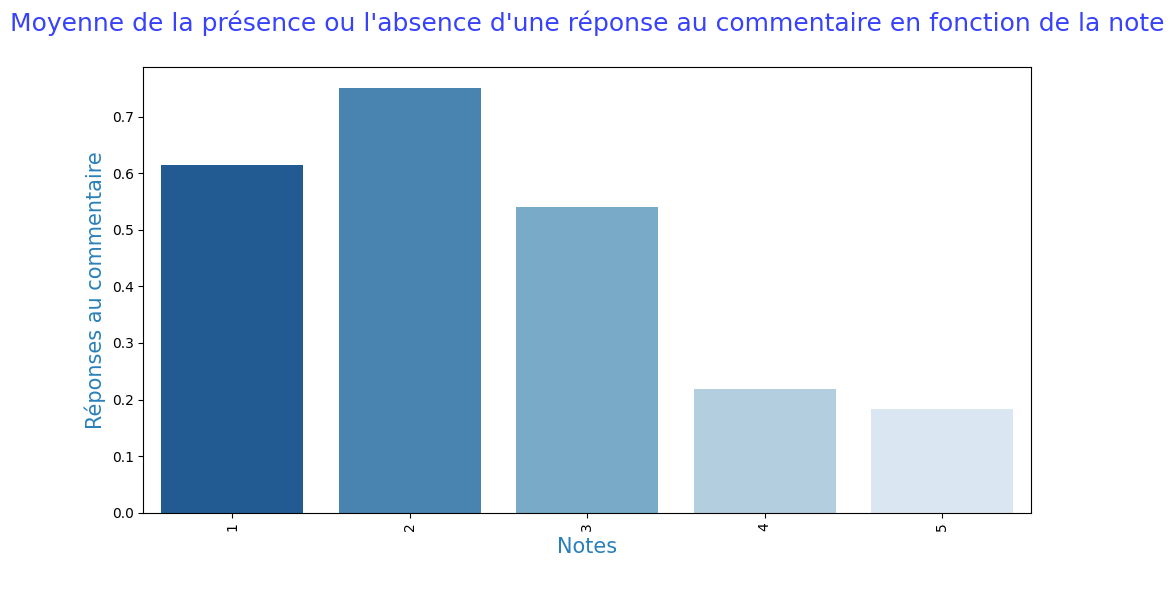

In [ ]:
notesrep = df[['verif_reponses','notes']].groupby('notes').mean().sort_values(by='verif_reponses', ascending=False)
notesrep.reset_index(0, inplace=True)
notesrep.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notesrep['notes'], y= notesrep['verif_reponses'], palette="Blues_r")
plt.xlabel('Notes\n', fontsize=15, color='#2980b9')
plt.ylabel("\nRéponses au commentaire", fontsize=15, color='#2980b9')
plt.title("Moyenne de la présence ou l'absence d'une réponse au commentaire en fonction de la note\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

En présence d'une note très positif (5), il n'y a pas de réponse.
En présence d'une note très négative (1), il y a une réponse (pour s'excuser et trouver une solution).

**Identifier les word cloud pour chacune des notes**

In [ ]:
# Définir la variable text
# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords
#Importer les packages nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
# print(stop_words)

df1 = df.loc[df['notes'] == 1]
df2 = df.loc[df['notes'] == 2]
df3 = df.loc[df['notes'] == 3]
df4 = df.loc[df['notes'] == 4]
df5 = df.loc[df['notes'] == 5]

### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text1 pour la note 1
text1 = ""
for comment in df1['commentaire_en_sans_SW']:
    text1 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text2 pour la note 2
text2 = ""
for comment in df2['commentaire_en_sans_SW']:
    text2 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text3 pour la note 3
text3 = ""
for comment in df3['commentaire_en_sans_SW']:
    text3 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text4 pour la note 4
text4 = ""
for comment in df4['commentaire_en_sans_SW']:
    text4 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text5 pour la note 5
text5 = ""
for comment in df5['commentaire_en_sans_SW']:
    text5 += comment

print('dimension de text1:',len(text1))
print('dimension de text2:',len(text2))
print('dimension de text3:',len(text3))
print('dimension de text4:',len(text4))
print('dimension de text5:',len(text5))

text_total = text1 + text2 + text3 + text4 + text5
print('\ndimension de text_total:',len(text_total))


dimension de text1: 3427183
dimension de text2: 393415
dimension de text3: 347667
dimension de text4: 549113
dimension de text5: 2631868

dimension de text_total: 7349246


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

%matplotlib inline
# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)



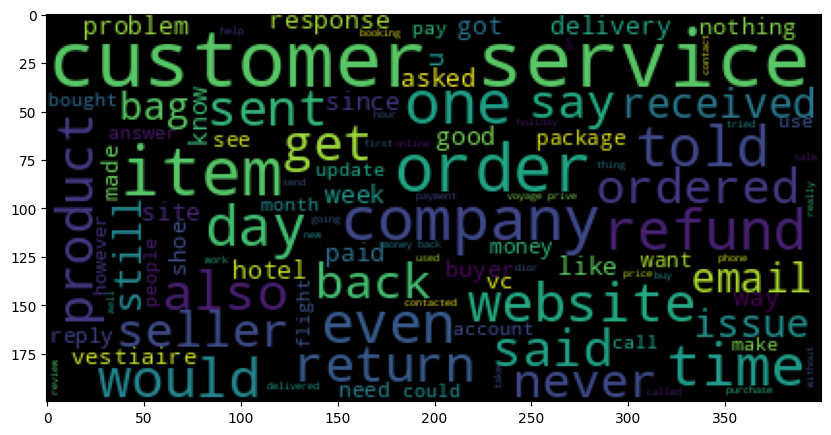

In [ ]:
# Générer et afficher le nuage de mots pour la note 1

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text1)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Pour la note 1, les mots qui reviennent le plus dans les commentaires sont: return, refund, problem.

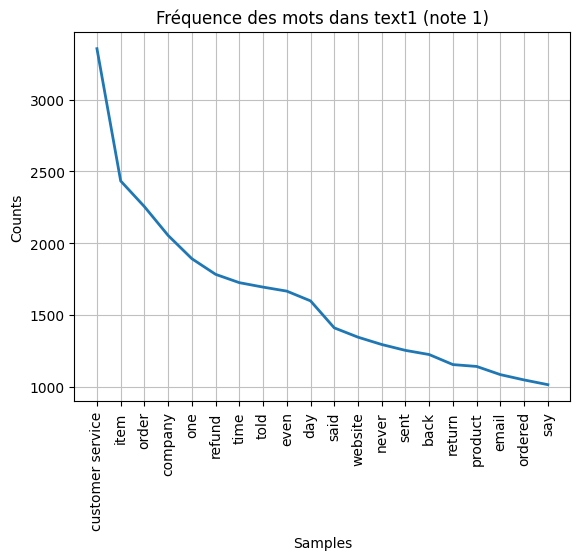

In [ ]:
words1 = wc.process_text(text1)
freq = nltk.FreqDist(words1)
freq.plot(20,title="Fréquence des mots dans text1 (note 1)");

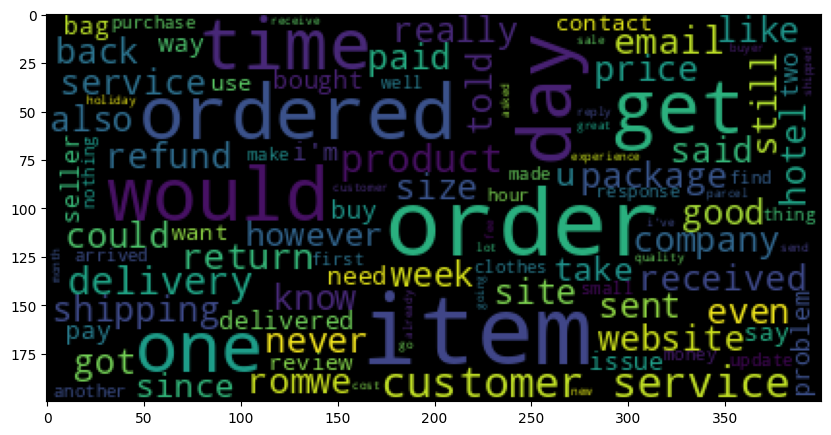

In [ ]:
# Générer et afficher le nuage de mots pour la note 2

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text2)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Pour la note 2, les mots qui reviennent le plus dans les commentaires sont: issue, refund, back service.

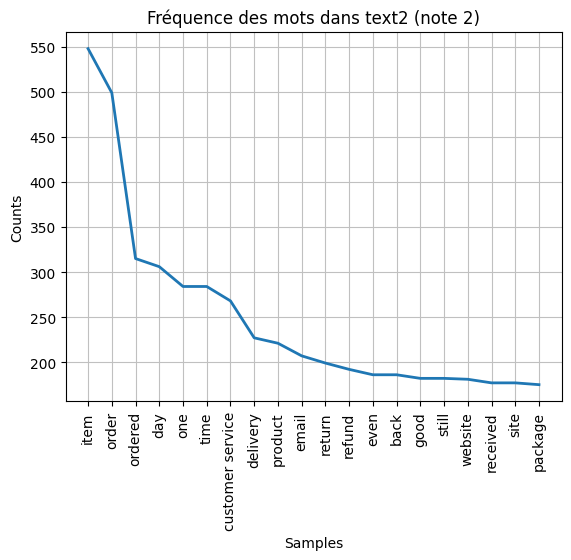

In [ ]:
words2 = wc.process_text(text2)
freq = nltk.FreqDist(words2)
freq.plot(20,title="Fréquence des mots dans text2 (note 2)");

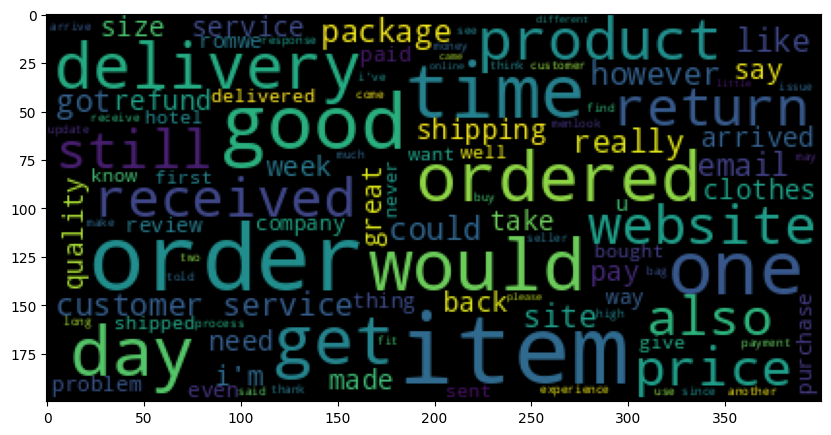

In [ ]:
# Générer et afficher le nuage de mots pour la note 3

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text3)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Pour la note 3, les mots qui reviennent le plus dans les commentaires sont: good, return.

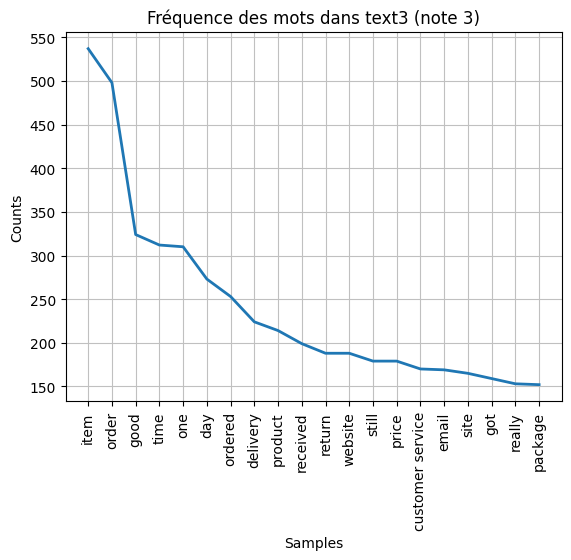

In [ ]:
words3 = wc.process_text(text3)
freq = nltk.FreqDist(words3)
freq.plot(20,title="Fréquence des mots dans text3 (note 3)");

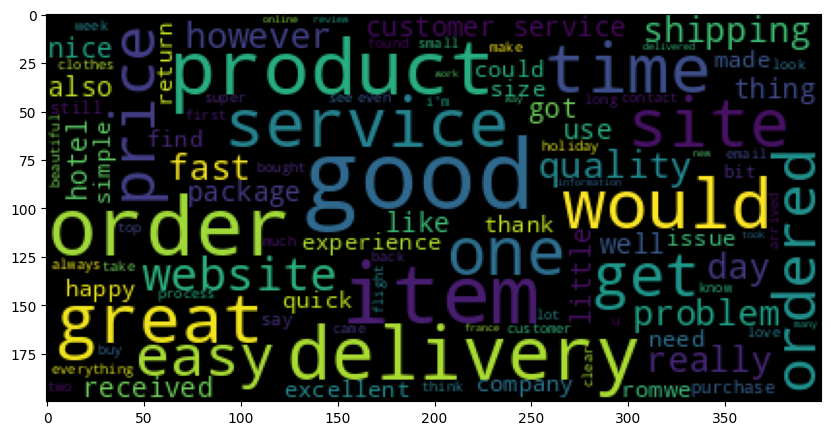

In [ ]:
# Générer et afficher le nuage de mots pour la note 34

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text4)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Pour la note 4, les mots qui reviennent le plus dans les commentaires sont: good product, great, nice.

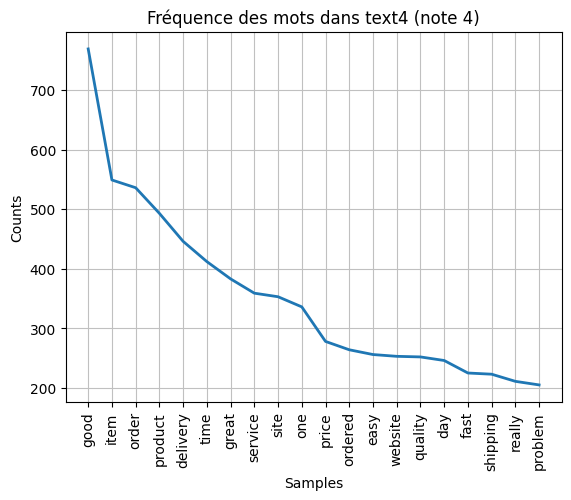

In [ ]:
words4 = wc.process_text(text4)
freq = nltk.FreqDist(words4)
freq.plot(20,title="Fréquence des mots dans text4 (note 4)");

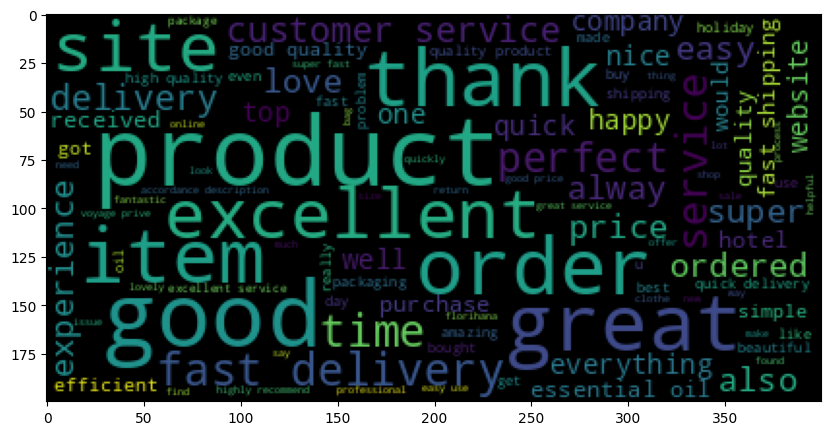

In [ ]:
# Générer et afficher le nuage de mots pour la note 5

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text5)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Pour la note 5, les mots qui reviennent le plus dans les commentaires sont: good quality, excellent, fast delivery, love, happy, perfect

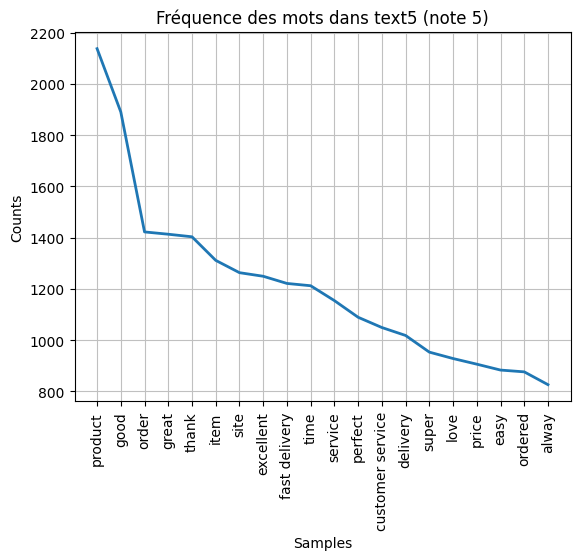

In [ ]:
words5 = wc.process_text(text5)
freq = nltk.FreqDist(words5)
freq.plot(20,title="Fréquence des mots dans text5 (note 5)");

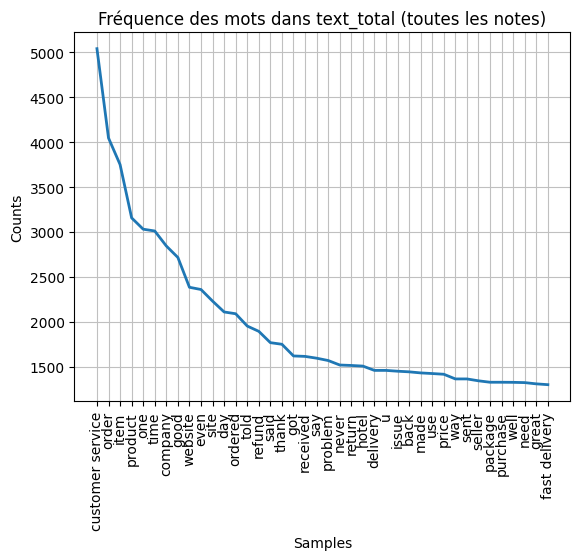

In [ ]:
## fréquence des mots pour tputes les notes
words_t = wc.process_text(text_total)
freq = nltk.FreqDist(words_t)
freq.plot(40,title="Fréquence des mots dans text_total (toutes les notes)");

**Corrélations**


<ipython-input-98-3fbbc93491f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


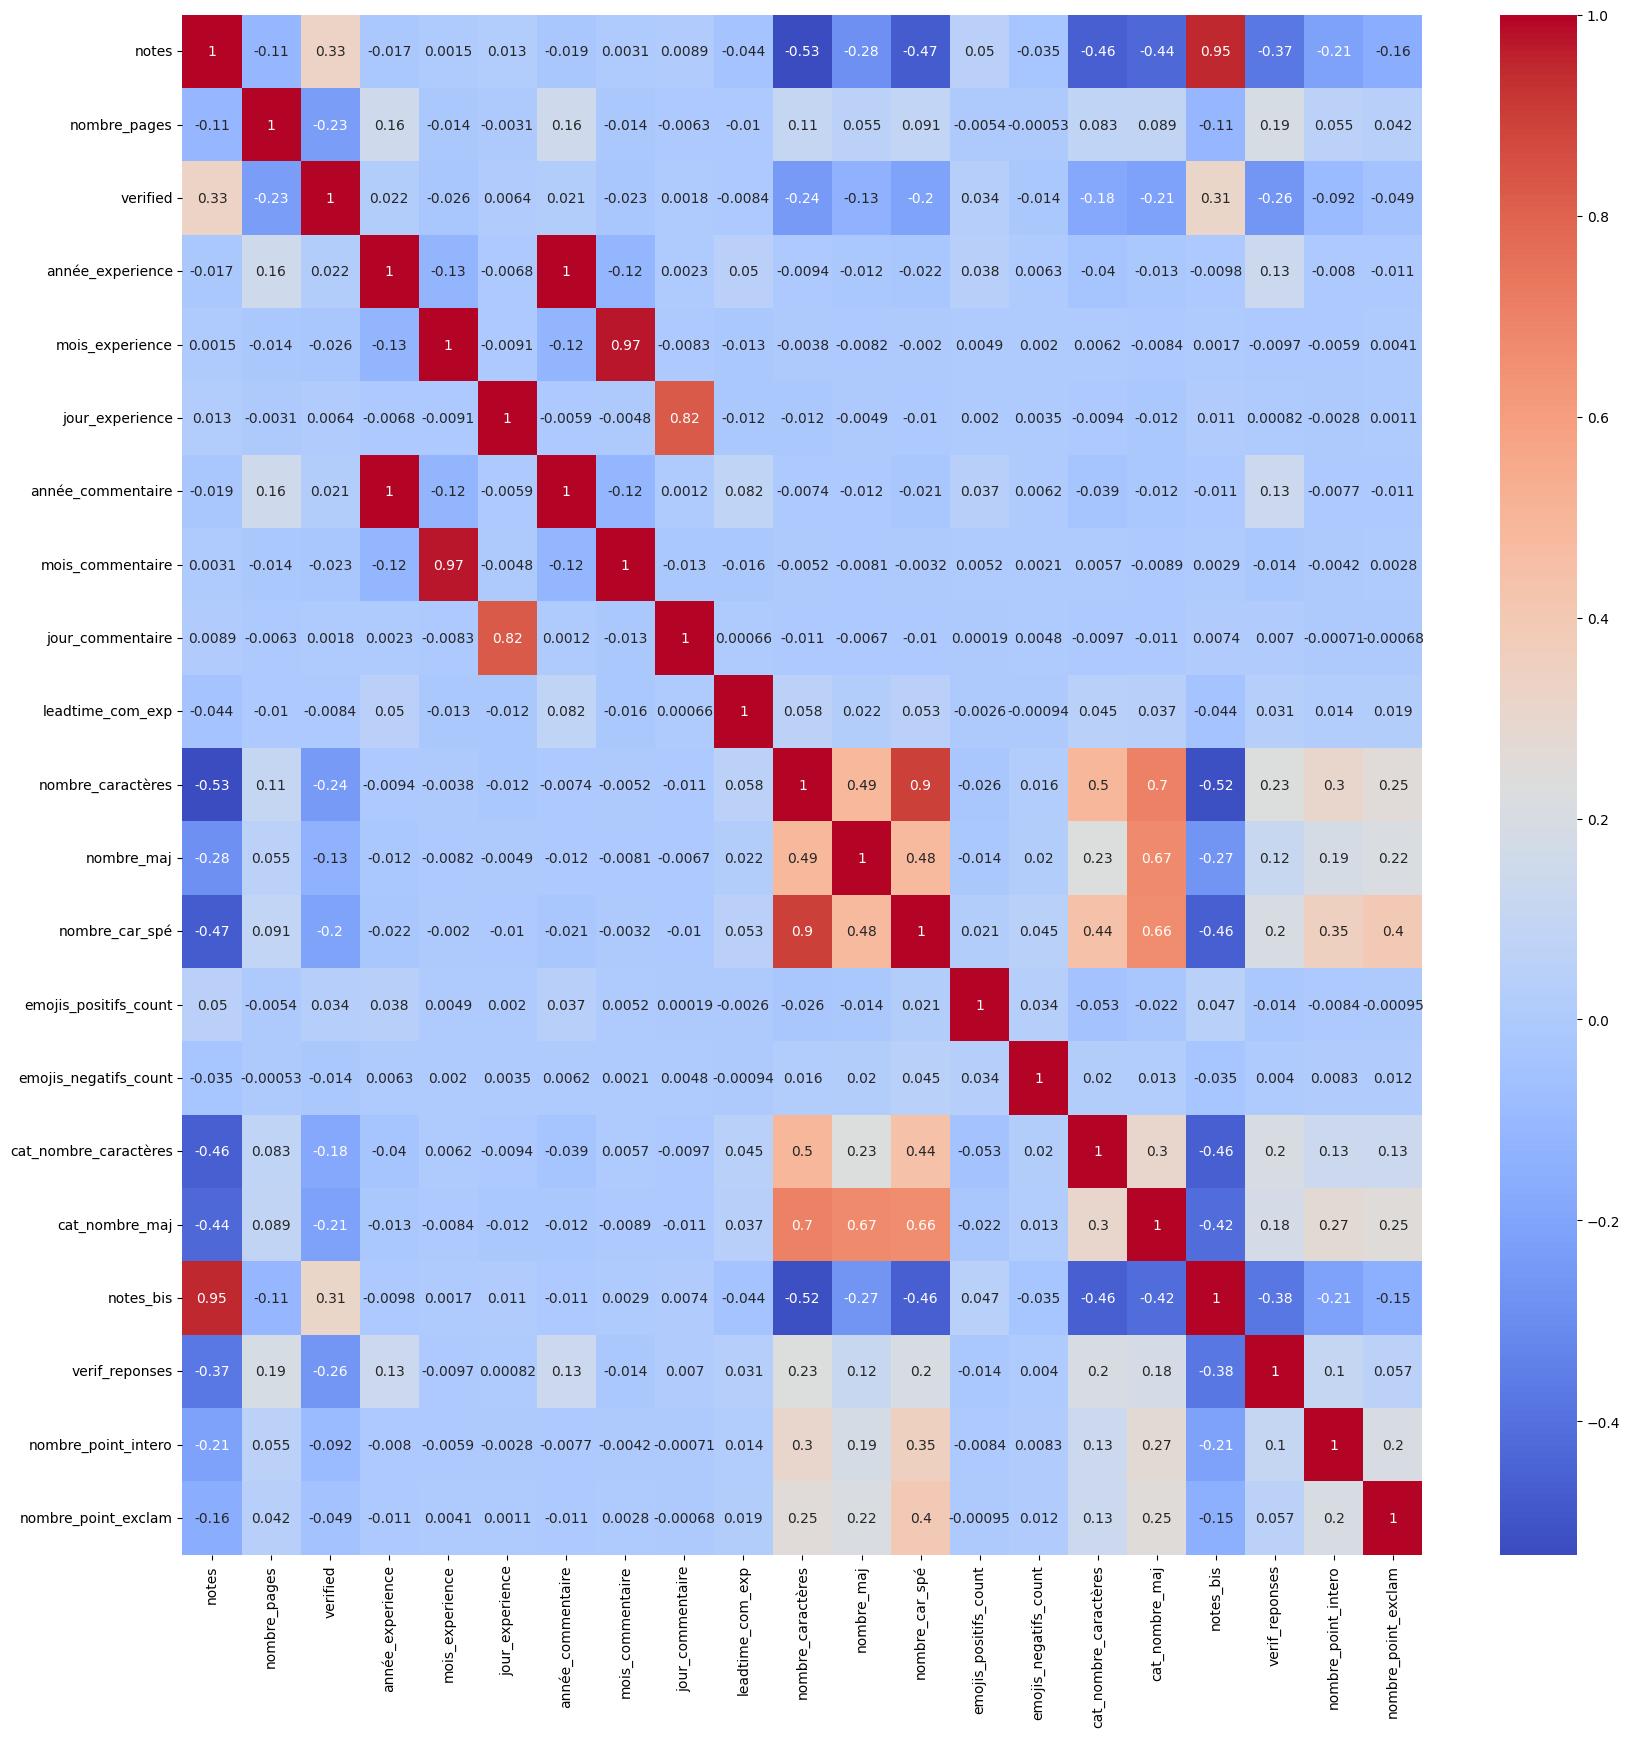

In [ ]:
cor = df.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');


**Tests statistiques**

In [ ]:
##  ANOVA nombre de caractère:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~ nombre_caractères', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de caractère sur la note.


df         sum_sq       mean_sq             F  PR(>F)
nombre_caractères      1.0   32717.497562  32717.497562  20885.832218     0.0
Residual           65458.0  102539.459908      1.566492           NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA nombre de caractère:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~ cat_nombre_caractères', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de caractère sur la note.


df       sum_sq      mean_sq             F  PR(>F)
cat_nombre_caractères      1.0  2178.208487  2178.208487  17710.850758     0.0
Residual               65458.0  8050.498143     0.122987           NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA nombre de majuscules:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~ nombre_maj ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de majuscules sur la note.

df         sum_sq       mean_sq             F  PR(>F)
nombre_maj      1.0   25311.352067  25311.352067  15069.547141     0.0
Residual    65458.0  109945.605403      1.679636           NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA nombre de majuscules:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~ cat_nombre_maj', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de caractère sur la note.


df       sum_sq      mean_sq            F  PR(>F)
cat_nombre_maj      1.0  1698.956371  1698.956371  12502.00103     0.0
Residual        58847.0  7996.998666     0.135895          NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA emojis positif:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~ emojis_positifs_count ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# On conclut donc a une influence significative du type du nombre d'émojis positif sur la note.


df        sum_sq     mean_sq           F  \
emojis_positifs_count      1.0     343.49834  343.498340  166.660276   
Residual               65458.0  134913.45913    2.061069         NaN   

                             PR(>F)  
emojis_positifs_count  4.417539e-38  
Residual                        NaN

In [ ]:
##  ANOVA emojis positif:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~ emojis_positifs_count ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# On conclut donc a une influence significative du type du nombre d'émojis positif sur la note.


df        sum_sq    mean_sq           F  \
emojis_positifs_count      1.0     22.830806  22.830806  146.431222   
Residual               65458.0  10205.875824   0.155915         NaN   

                             PR(>F)  
emojis_positifs_count  1.135185e-33  
Residual                        NaN

Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


In [ ]:
##  ANOVA emojis negatif:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~ emojis_negatifs_count ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# On conclut donc a une influence significative du type du nombre d'émojis positif sur la note.

df         sum_sq     mean_sq          F  \
emojis_negatifs_count      1.0     162.047915  162.047915  78.517632   
Residual               65458.0  135094.909556    2.063841        NaN   

                             PR(>F)  
emojis_negatifs_count  8.122327e-19  
Residual                        NaN

Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


In [ ]:
##  ANOVA emojis negatif:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~ emojis_negatifs_count ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# On conclut donc a une influence significative du type du nombre d'émojis positif sur la note.

df        sum_sq    mean_sq          F  \
emojis_negatifs_count      1.0     12.441751  12.441751  79.717212   
Residual               65458.0  10216.264879   0.156074        NaN   

                             PR(>F)  
emojis_negatifs_count  4.428937e-19  
Residual                        NaN

Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


In [ ]:
##  ANOVA point d'interrogation:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~  nombre_point_intero ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de point d'interrogation sur la note.

df         sum_sq      mean_sq            F  PR(>F)
nombre_point_intero      1.0    6169.911506  6169.911506  3128.664572     0.0
Residual             65458.0  129087.045964     1.972059          NaN     NaN

In [ ]:
##  ANOVA point d'interrogation:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~  nombre_point_intero ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de point d'interrogation sur la note.

df       sum_sq     mean_sq           F  PR(>F)
nombre_point_intero      1.0   454.907176  454.907176  3046.64671     0.0
Residual             65458.0  9773.799454    0.149314         NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA point d'exclamation:
import statsmodels.api
result = statsmodels.formula.api.ols('notes ~   nombre_point_exclam  ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de point d'exclamation sur la note.

df         sum_sq      mean_sq            F  PR(>F)
nombre_point_exclam      1.0    3404.425735  3404.425735  1690.122266     0.0
Residual             65458.0  131852.531735     2.014307          NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.


In [ ]:
##  ANOVA point d'exclamation:
import statsmodels.api
result = statsmodels.formula.api.ols('notes_bis ~   nombre_point_exclam  ', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.")
# On conclut qu'il ne semble pas y avoir d'influence significative du type de nombre de point d'exclamation sur la note.

df       sum_sq     mean_sq            F  PR(>F)
nombre_point_exclam      1.0   233.557072  233.557072  1529.559786     0.0
Residual             65458.0  9995.149558    0.152696          NaN     NaN

Conclusion : La p-value (PR(>F)) est supérieur à 5% donc on ne rejette pas H0.
